*******
<div style="padding:20px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#bdd6f5;overflow:hidden;font-weight:500">Projet 7  : Modèle de score bancaire</div>

*******

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">Présentation</div>
<a class="anchor" id="Section_1.1"></a>

Projet Kaggle [Home Credit Defaut Risk](https://www.kaggle.com/c/home-credit-default-risk/data). Il s'agit de créer le meilleur modèle de risque de default.
Nous testerons trois modèles:
- Une régression logistique (Scikit-learn)
- Un classifieur binaire XGBoost
- un réseau de neurone

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">1.1 Analyses univariée et multivariée</div>
<a class="anchor" id="Section_1.1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
path_df = "C:/Users/fbbou/Desktop/DOCUMENT/OpenClassrooms/Parcour DATA_SCIENTIST/P7/home-credit-default-risk/"

In [3]:
# Création d'un DF des données
df = pd.read_csv(path_df +"application_train.csv",index_col="SK_ID_CURR")
df

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           1         Cash loans           M            N   
100003           0         Cash loans           F            N   
100004           0    Revolving loans           M            Y   
100006           0         Cash loans           F            N   
100007           0         Cash loans           M            N   
...            ...                ...         ...          ...   
456251           0         Cash loans           M            N   
456252           0         Cash loans           F            N   
456253           0         Cash loans           F            N   
456254           1         Cash loans           F            N   
456255           0         Cash loans           F            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
100002                   Y             0          202500.0    406597.5   
100003                   N             0          270000.0   1293502.5   
100004                   Y             0           67500.0    135000.0   
100006                   Y             0          135000.0    312682.5   
100007                   Y             0          121500.0    513000.0   
...                    ...           ...               ...         ...   
456251                   N             0          157500.0    254700.0   
456252                   Y             0           72000.0    269550.0   
456253                   Y             0          153000.0    677664.0   
456254                   Y             0          171000.0    370107.0   
456255                   N             0          157500.0    675000.0   

            AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18  \
SK_ID_CURR                                ...                    
100002          24700.5         351000.0  ...                0   
100003          35698.5        1129500.0  ...                0   
100004           6750.0         135000.0  ...                0   
100006          29686.5         297000.0  ...                0   
100007          21865.5         513000.0  ...                0   
...                 ...              ...  ...              ...   
456251          27558.0         225000.0  ...                0   
456252          12001.5         225000.0  ...                0   
456253          29979.0         585000.0  ...                0   
456254          20205.0         319500.0  ...                0   
456255          49117.5         675000.0  ...                0   

           FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
SK_ID_CURR                                                      
100002                    0                0                0   
100003                    0                0                0   
100004                    0                0                0   
100006                    0                0                0   
100007                    0                0                0   
...                     ...              ...              ...   
456251                    0                0                0   
456252                    0                0                0   
456253                    0                0                0   
456254                    0                0                0   
456255                    0                0                0   

           AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                                                         
100002                            0.0                        0.0   
100003                            0.0                        0.0   
100004                            0.0                        0.0   
100006                            NaN                        NaN   
100007                            0.0                        0.0   
...      

In [4]:
# Renommage des variables
df.rename(columns={"NAME_CONTRACT_TYPE":"Contrat",
                   "CODE_GENDER":"Genre",
                   "FLAG_OWN_CAR":"Voiture",
                   "CNT_CHILDREN":"Enfant",
                   "AMT_INCOME_TOTAL":"Salaire"},
          inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

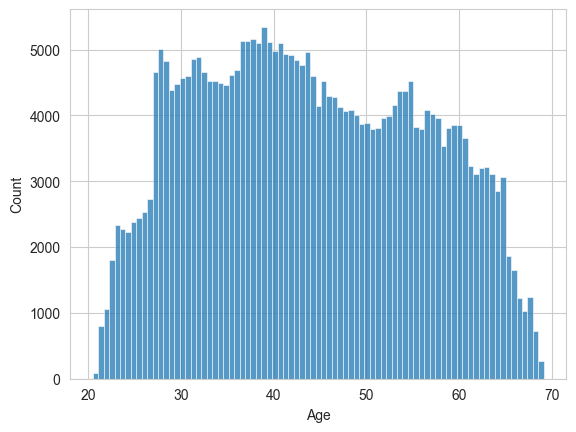

In [5]:
# Mise en forme de variables journalières en variables annuelles
df["Age"] = df["DAYS_BIRTH"]/(-365)
sns.histplot(df,x="Age")

<Axes: xlabel='Duree', ylabel='Count'>

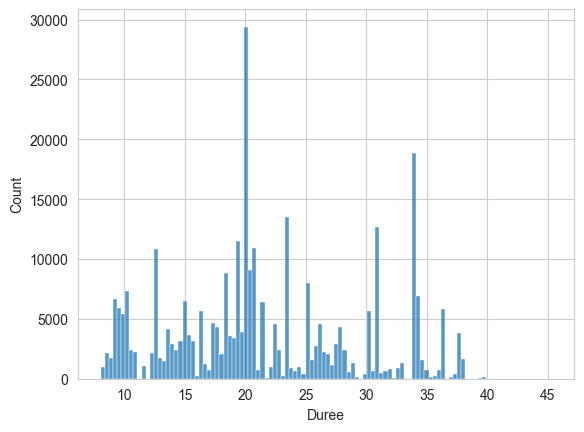

In [6]:
df["Duree"] = df["AMT_CREDIT"]/df["AMT_ANNUITY"]
sns.histplot(df, x="Duree")

<class 'pandas.core.series.Series'>
Int64Index: 307511 entries, 100002 to 456255
Series name: Anciennete
Non-Null Count   Dtype  
--------------   -----  
252137 non-null  float64
dtypes: float64(1)
memory usage: 4.7 MB
None


<Axes: xlabel='Anciennete', ylabel='Count'>

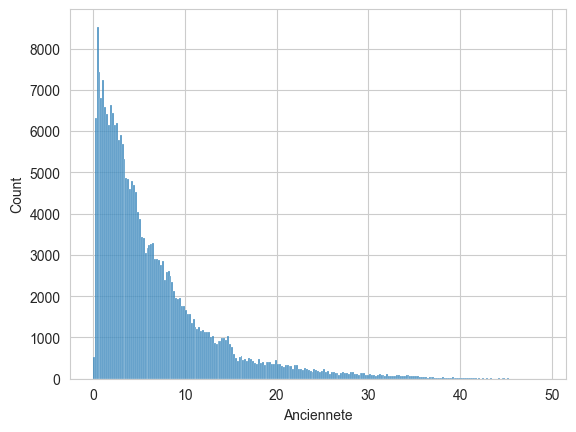

In [7]:
df["Anciennete"] = df["DAYS_EMPLOYED"]/(-365)
df["Anciennete"] = np.where(df["Anciennete"]>(-200),df["Anciennete"],np.nan)
print(df["Anciennete"].info())
sns.histplot(df,x="Anciennete")

In [8]:
# Suppression des colonnes DAYS_EMPLOYED
df.drop(columns=["DAYS_EMPLOYED","DAYS_BIRTH"],inplace=True)

In [9]:
# description des features
df_desc = pd.read_csv(path_df + "HomeCredit_columns_description.csv",
                      sep=",", quotechar ='"',encoding="cp1252")

df_desc.drop(columns=["Unnamed: 0"],inplace=True)
df_desc

Table                    Row  \
0    application_{train|test}.csv             SK_ID_CURR   
1    application_{train|test}.csv                 TARGET   
2    application_{train|test}.csv     NAME_CONTRACT_TYPE   
3    application_{train|test}.csv            CODE_GENDER   
4    application_{train|test}.csv           FLAG_OWN_CAR   
..                            ...                    ...   
214     installments_payments.csv  NUM_INSTALMENT_NUMBER   
215     installments_payments.csv        DAYS_INSTALMENT   
216     installments_payments.csv     DAYS_ENTRY_PAYMENT   
217     installments_payments.csv         AMT_INSTALMENT   
218     installments_payments.csv            AMT_PAYMENT   

                                           Description  \
0                             ID of loan in our sample   
1    Target variable (1 - client with payment diffi...   
2          Identification if loan is cash or revolving   
3                                 Gender of the client   
4                        Flag if the client owns a car   
..                                                 ...   
214            On which installment we observe payment   
215  When the installment of previous credit was su...   
216  When was the installments of previous credit p...   
217  What was the prescribed installment amount of ...   
218  What the client actually paid on previous cred...   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
214                                    NaN  
215  time only relative to the application  
216  time only relative to the application  
217                                    NaN  
218                                    NaN  

[219 rows x 4 columns]

Suppression des features qui ne doivent pas être incluses dans le  modèle :
- Data leakage (scores pré-réalisé)
- Présence de documents administratif

In [10]:
# Suppression des 3 scores
df.drop(columns=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'],
        axis=1,inplace=True)

# Supression de toutes les variables contenant FLAG_DOCUMENT
expression = "FLAG_DOCUMENT"
list_doc_flag = list(df.filter(regex=expression, axis=1).columns)
df.drop(columns = list_doc_flag,inplace=True)

In [11]:
df.select_dtypes(include=['object']).describe()

Contrat   Genre Voiture FLAG_OWN_REALTY NAME_TYPE_SUITE  \
count       307511  307511  307511          307511          306219   
unique           2       3       2               2               7   
top     Cash loans       F       N               Y   Unaccompanied   
freq        278232  202448  202924          213312          248526   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            307511                         307511             307511   
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   

        NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
count              307511          211120                     307511   
unique                  6              18                          7   
top     House / apartment        Laborers                    TUESDAY   
freq               272868           55186                      53901   

             ORGANIZATION_TYPE FONDKAPREMONT_MODE  HOUSETYPE_MODE  \
count                   307511              97216          153214   
unique                      58                  4               3   
top     Business Entity Type 3   reg oper account  block of flats   
freq                     67992              73830          150503   

       WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count              151170              161756  
unique                  7                   2  
top                 Panel                  No  
freq                66040              159428

In [12]:
# Réccupération des information de la table bureau

# Remplissage des 3 nouvelles colonnes par 0
values = {"sum":0,"count":0,"max":0}
# Group by
df_bur = pd.read_csv(path_df +"bureau.csv")
df_bur = df_bur[df_bur["CREDIT_ACTIVE"]=="Active"]
gb_n = df_bur.groupby('SK_ID_CURR')['DAYS_CREDIT'].agg(['count','max'])
gb_s = df_bur.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].agg(['sum'])
gb=pd.concat([gb_s,gb_n],axis=1)

# Mergin
df_merge = df.merge(gb,how='left',left_index=True,right_on="SK_ID_CURR")
df_merge.index = df.index
df_merge = df_merge.drop(columns=["SK_ID_CURR"])
df_merge = df_merge.fillna(values)
df = df_merge
df.shape

(307511, 102)

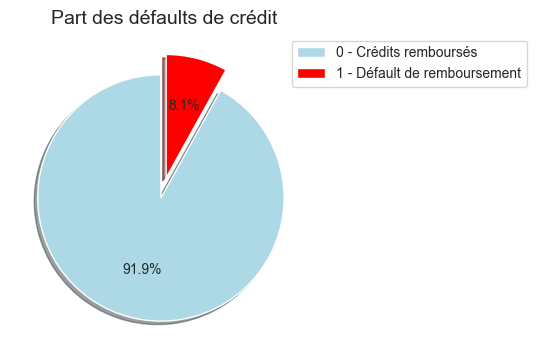

In [13]:
labels =df['TARGET'].value_counts(sort = True).index
sizes = df['TARGET'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.1,0.07)

plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.legend(["0 - Crédits remboursés", "1 - Défault de remboursement"], loc="lower right",bbox_to_anchor=(1.7, 0.8))

plt.title('Part des défaults de crédit',fontsize=14)
plt.show()

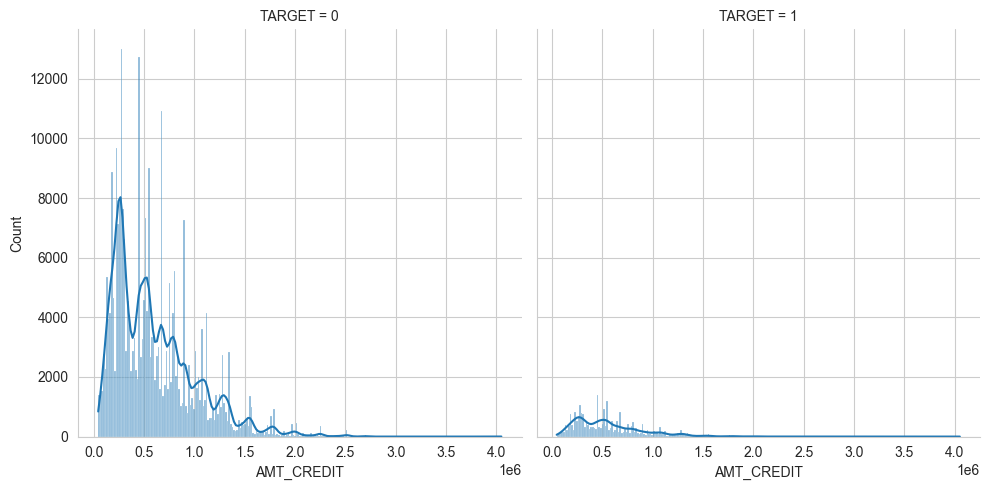

In [14]:
sns.displot(data=df, x="AMT_CREDIT", col="TARGET", kde=True)

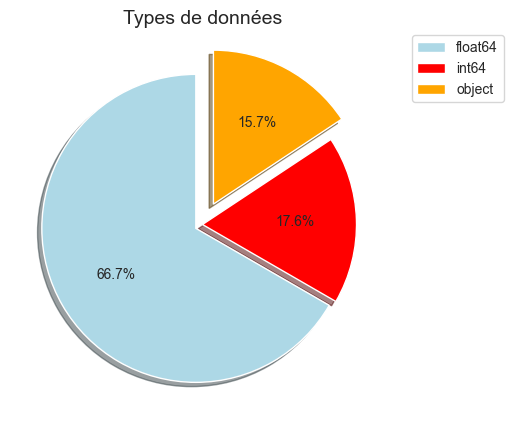

In [15]:
labels = df.dtypes.value_counts(normalize=True,sort = True).index
sizes = df.dtypes.value_counts(normalize=True,sort = True)

colors = ["lightblue","red","orange"]
explode = (0.05,0,0.15)

plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.legend(labels, loc="lower right",bbox_to_anchor=(1.3, 0.8))
plt.title('Types de données',fontsize=14)
plt.show()

### Analyse univariée

In [16]:
def hist_total(df):
    df_sample = df.groupby('TARGET').apply(lambda x: x.sample(frac=0.1))
# Séparer les variables explicatives et la variable cible
    feat_cols = df_sample.drop(columns=["TARGET"])
    target_col = df_sample.TARGET

# Créer la grille de sous-graphiques
    fig, axs = plt.subplots(nrows=26, ncols=4, figsize=(16, 45))

# Itérer à travers toutes les variables
    for i, feat_idx in enumerate(feat_cols):
    # Calculer les coordonnées de la sous-figure
        row_idx = i // 4
        col_idx = i % 4

    # Faire un histogramme pour la variable courante
        sns.histplot(data=feat_cols, x=feat_cols.iloc[:,i], hue=target_col, ax=axs[row_idx][col_idx], multiple="dodge")

# Ajuster l'espace entre les sous-figures
    plt.tight_layout()
    plt.show()

In [17]:
hist_total(df)

In [18]:
# Suppression des outliers
print(df.shape)
df = df[df["Salaire"]<1_000_000]
df = df[df["Enfant"]<10]
df = df[df["AMT_GOODS_PRICE"]<3_000_000]
print(df.shape)

(307511, 102)
(306946, 102)


In [19]:
# Création d'un sample avec le même nombre de lignes pr chaque classe de la target

groups = df.groupby('TARGET')
# Calculer la taille de l'échantillon équilibré
sample_size = groups.size().min()
# Échantillonner chaque groupe avec une taille égale au nombre minimum de valeurs dans chaque groupe
samples = [group.sample(n=sample_size) for _, group in groups]
# Combiner les échantillons en un seul DataFrame
balanced_df = pd.concat(samples)
# Réinitialiser les index du DataFrame
balanced_df = balanced_df.reset_index(drop=True)

print(balanced_df.shape)
print(balanced_df["TARGET"].value_counts())

(49578, 102)
0    24789
1    24789
Name: TARGET, dtype: int64


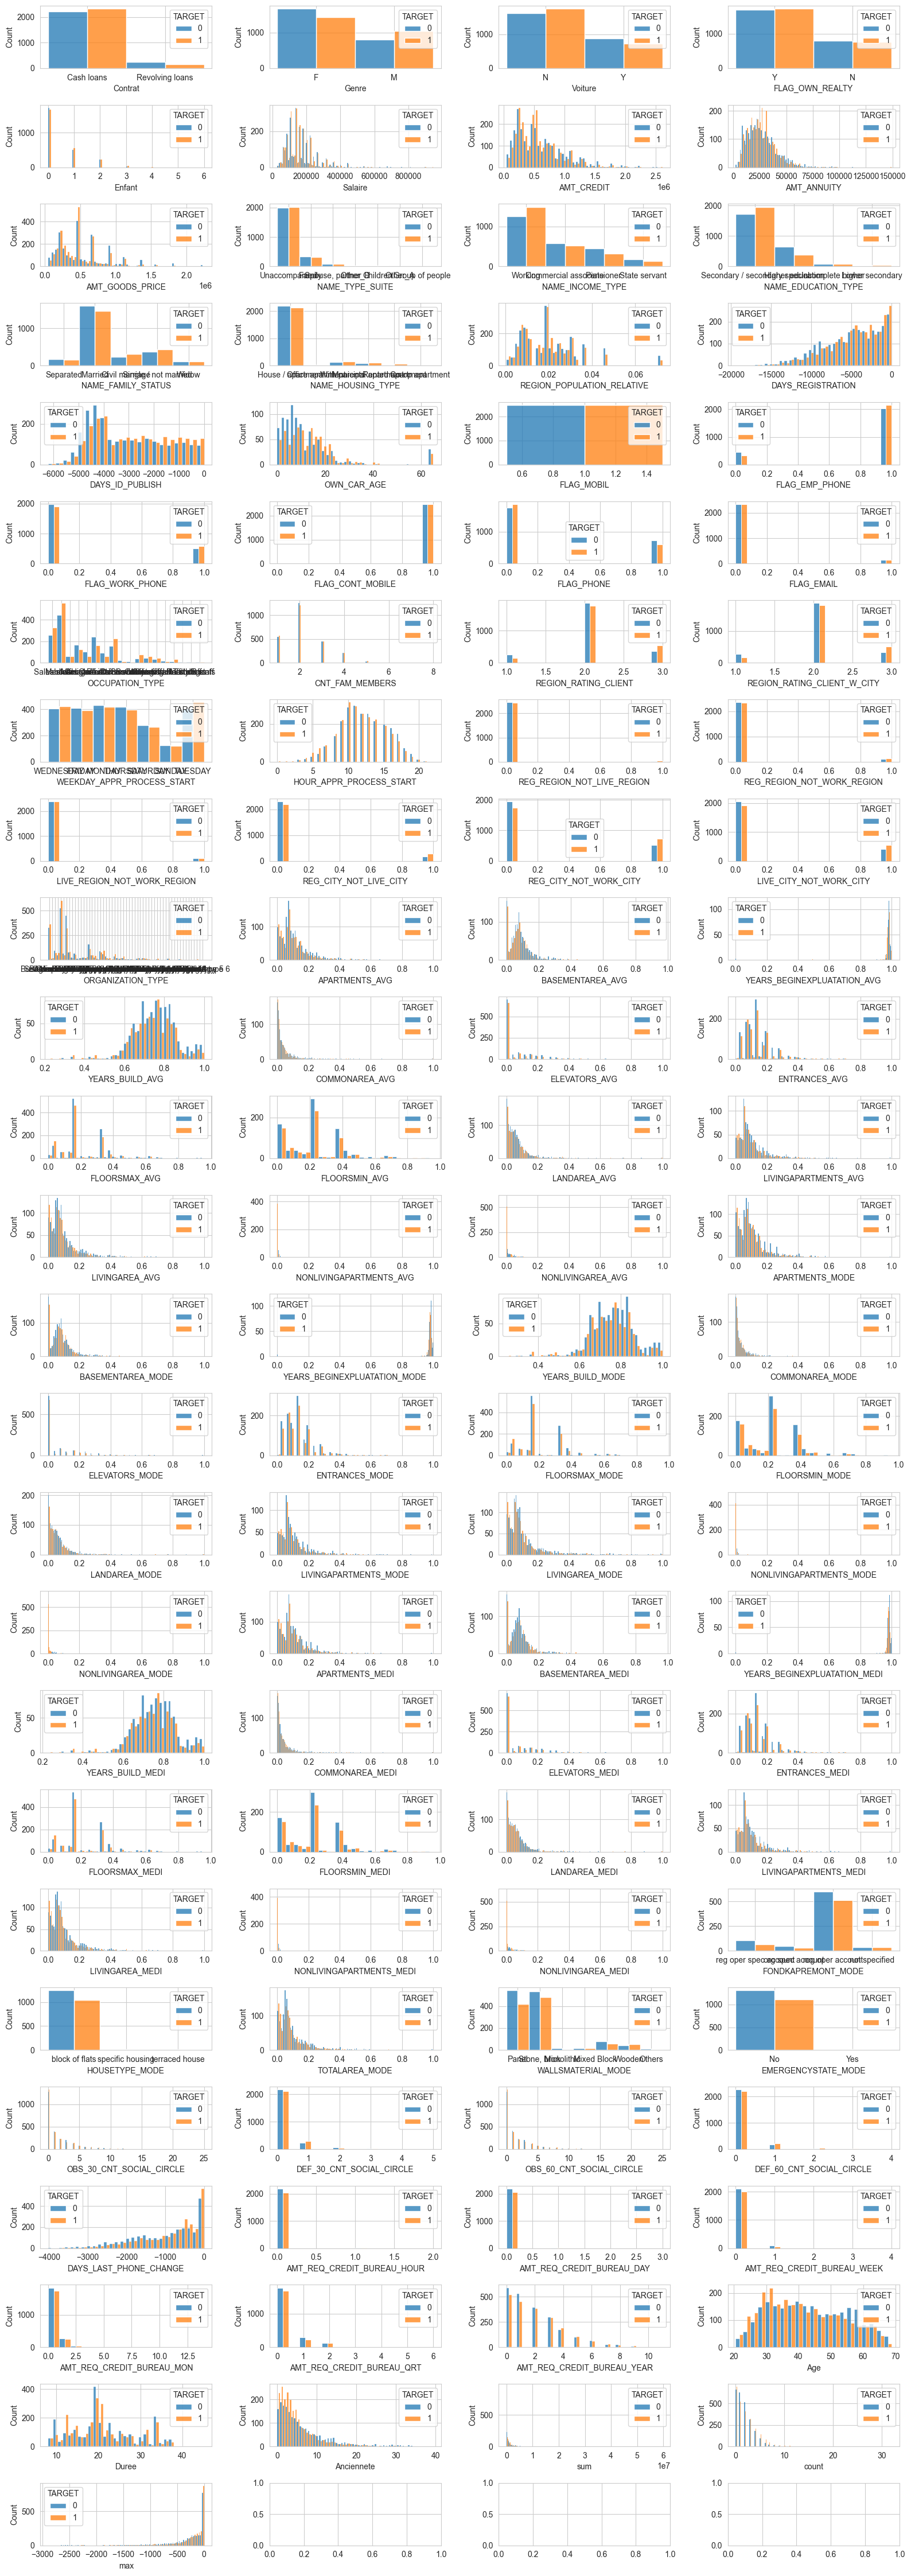

In [20]:
hist_total(balanced_df)

### Analyse multivariée

In [21]:
# Création des listes de features à étudier

list_categ = [ "Genre",
              "OCCUPATION_TYPE",
              "NAME_FAMILY_STATUS",
              "NAME_EDUCATION_TYPE",
              "NAME_INCOME_TYPE" ]

list_num = ["Enfant",
            "AMT_CREDIT",
            "AMT_GOODS_PRICE",
            "Salaire",
            "Age",
            "Anciennete",
            "Duree"]

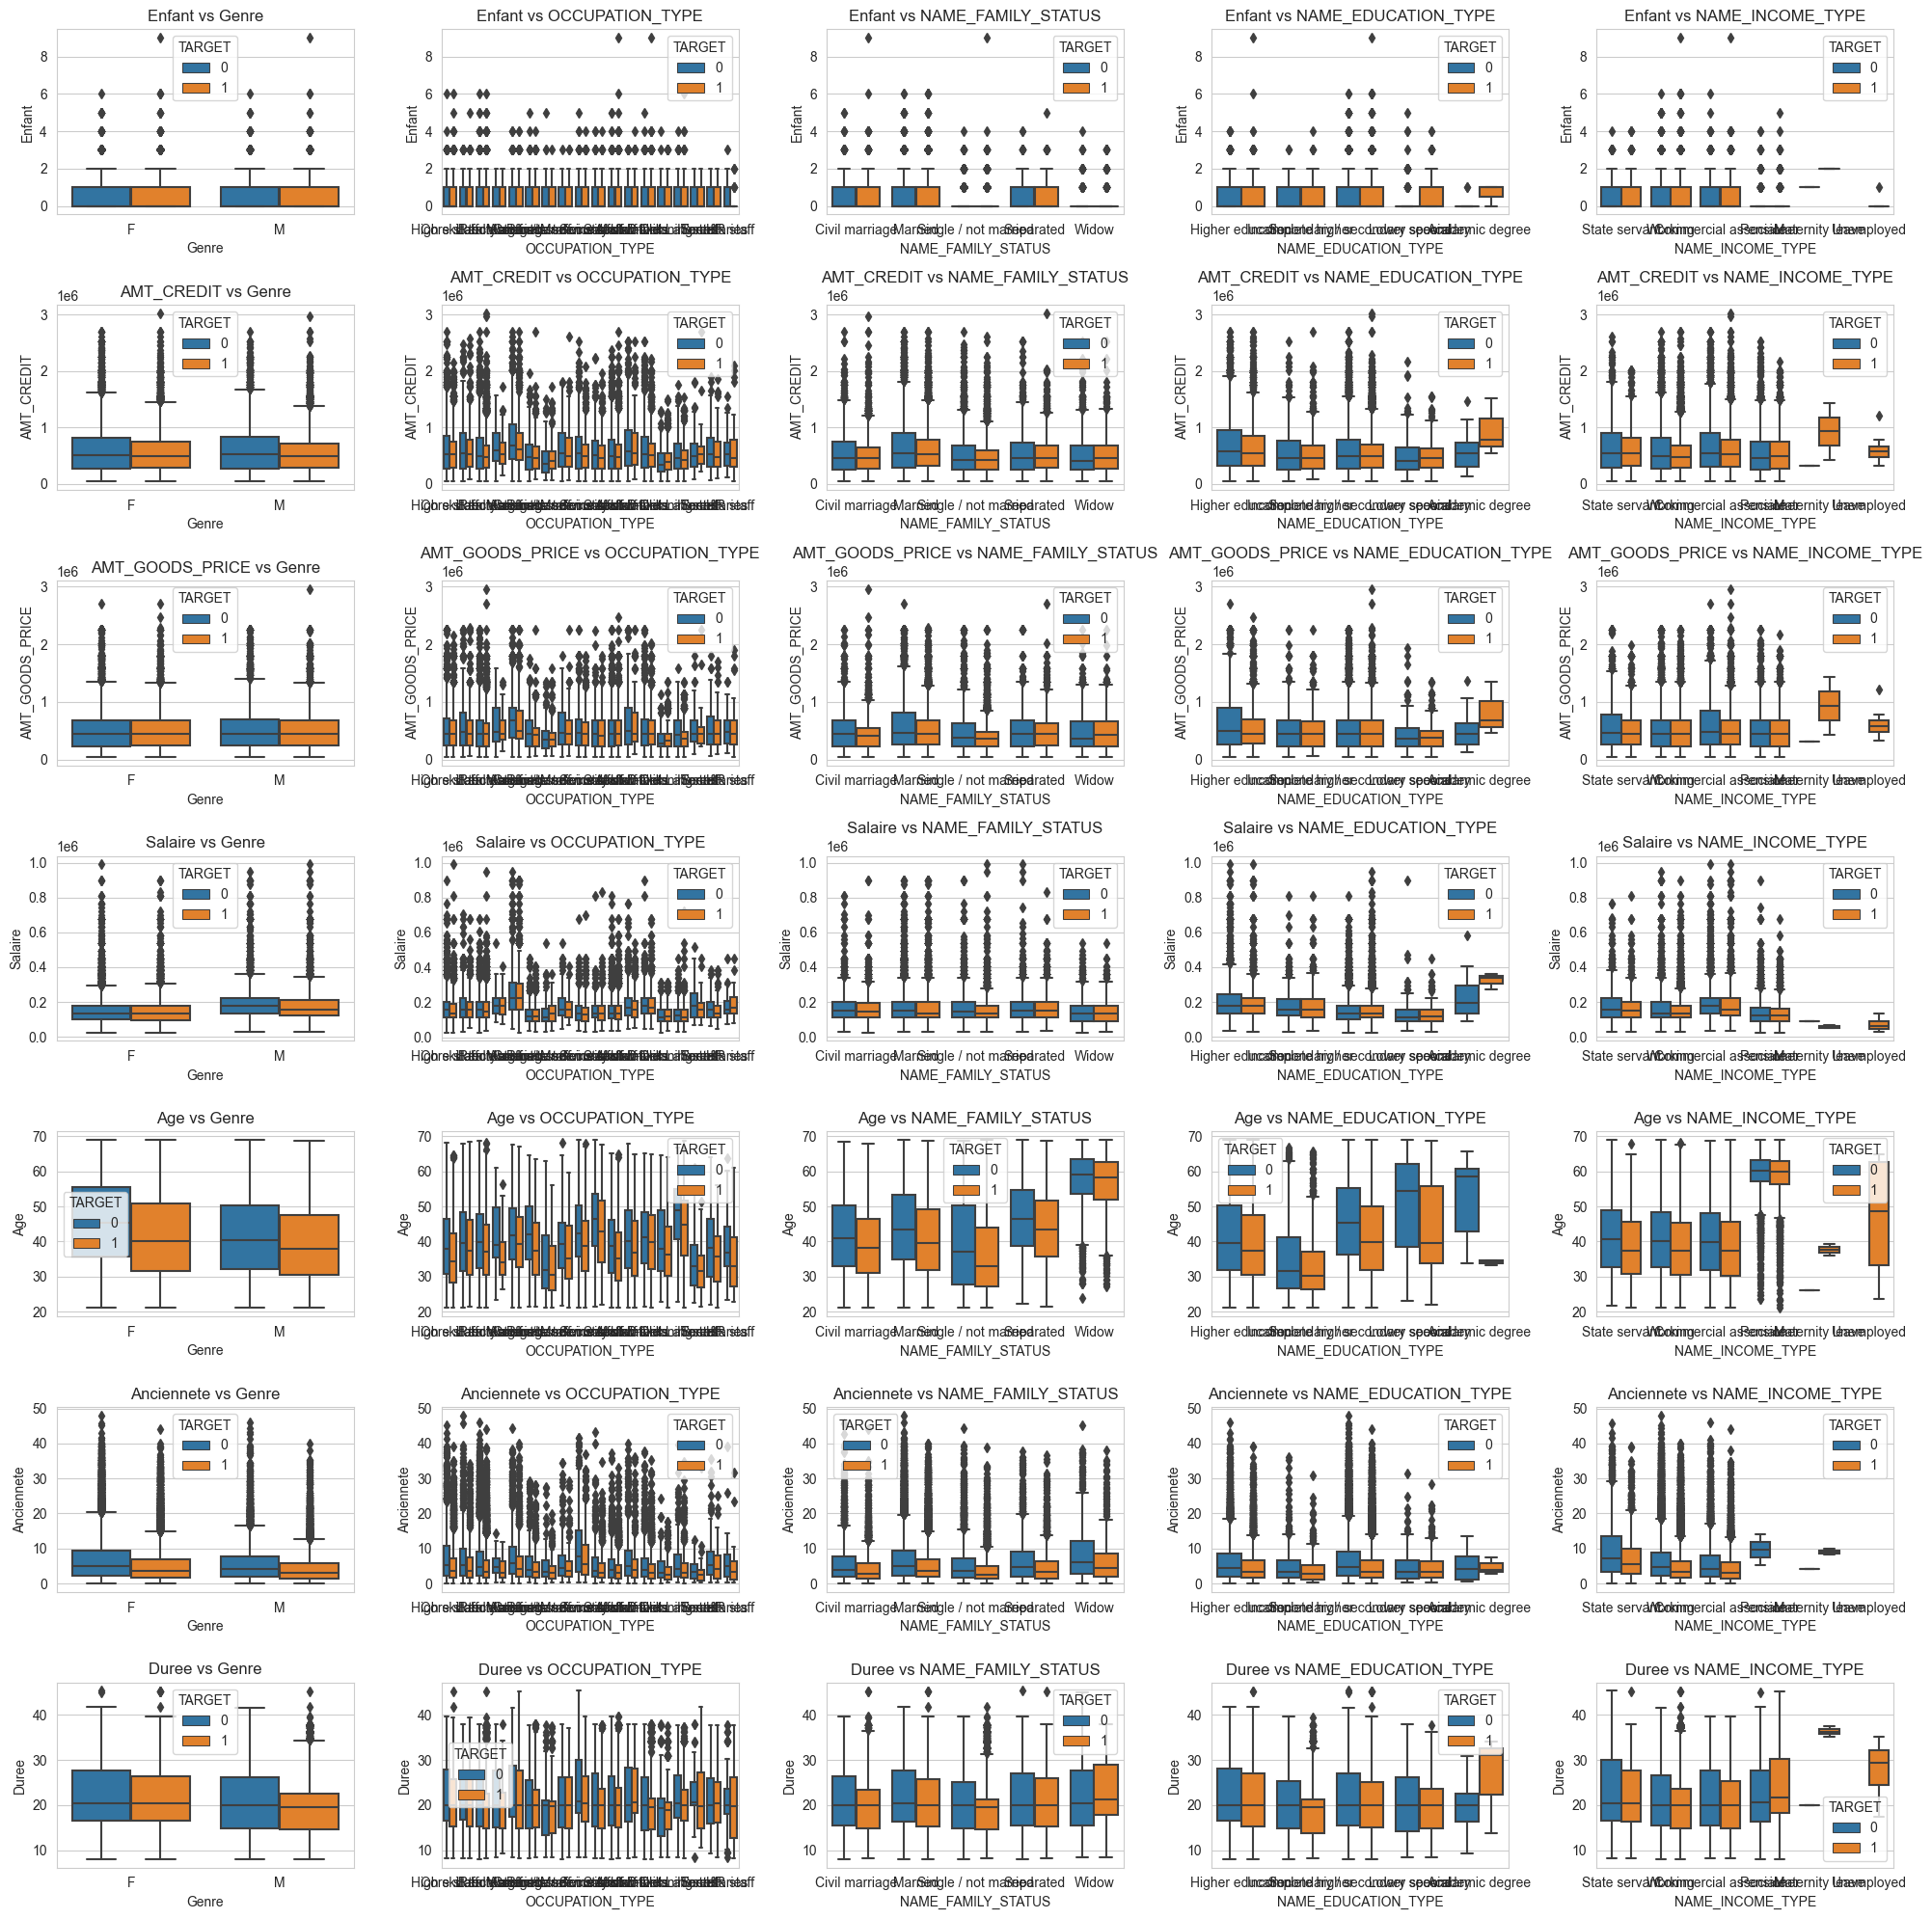

In [19]:
# Code réccupéré sur chatgpt et adapté

data = balanced_df
# Variables catégorielles
cat_vars = list_categ
# Variables numériques
num_vars = list_num
# Variable cible binaire
target_var = 'TARGET'

# Créer un tableau de graphiques (subplot) de type boxplot pour les variables numériques avec la variable cible en option hue
fig, axs = plt.subplots(nrows=len(num_vars), ncols=len(cat_vars), figsize=(20, 20))
for i, num_var in enumerate(num_vars):
    for j, cat_var in enumerate(cat_vars):
        sns.boxplot(x=cat_var, y=num_var, hue=target_var, data=data, ax=axs[i, j])
        axs[i, j].set_title('{} vs {}'.format(num_var, cat_var))

# Ajuster l'espace entre les sous-figures
plt.tight_layout()
# Afficher le tableau de graphiques
plt.show()

In [ ]:
sns.pairplot(data=balanced_df,vars=list_num, hue="TARGET", size=2.5,
             plot_kws=dict(alpha=0.5,palette=("blue","red")))

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">1.2 Données manquantes</div>
<a class="anchor" id="Section_1.1"></a>

<Axes: >

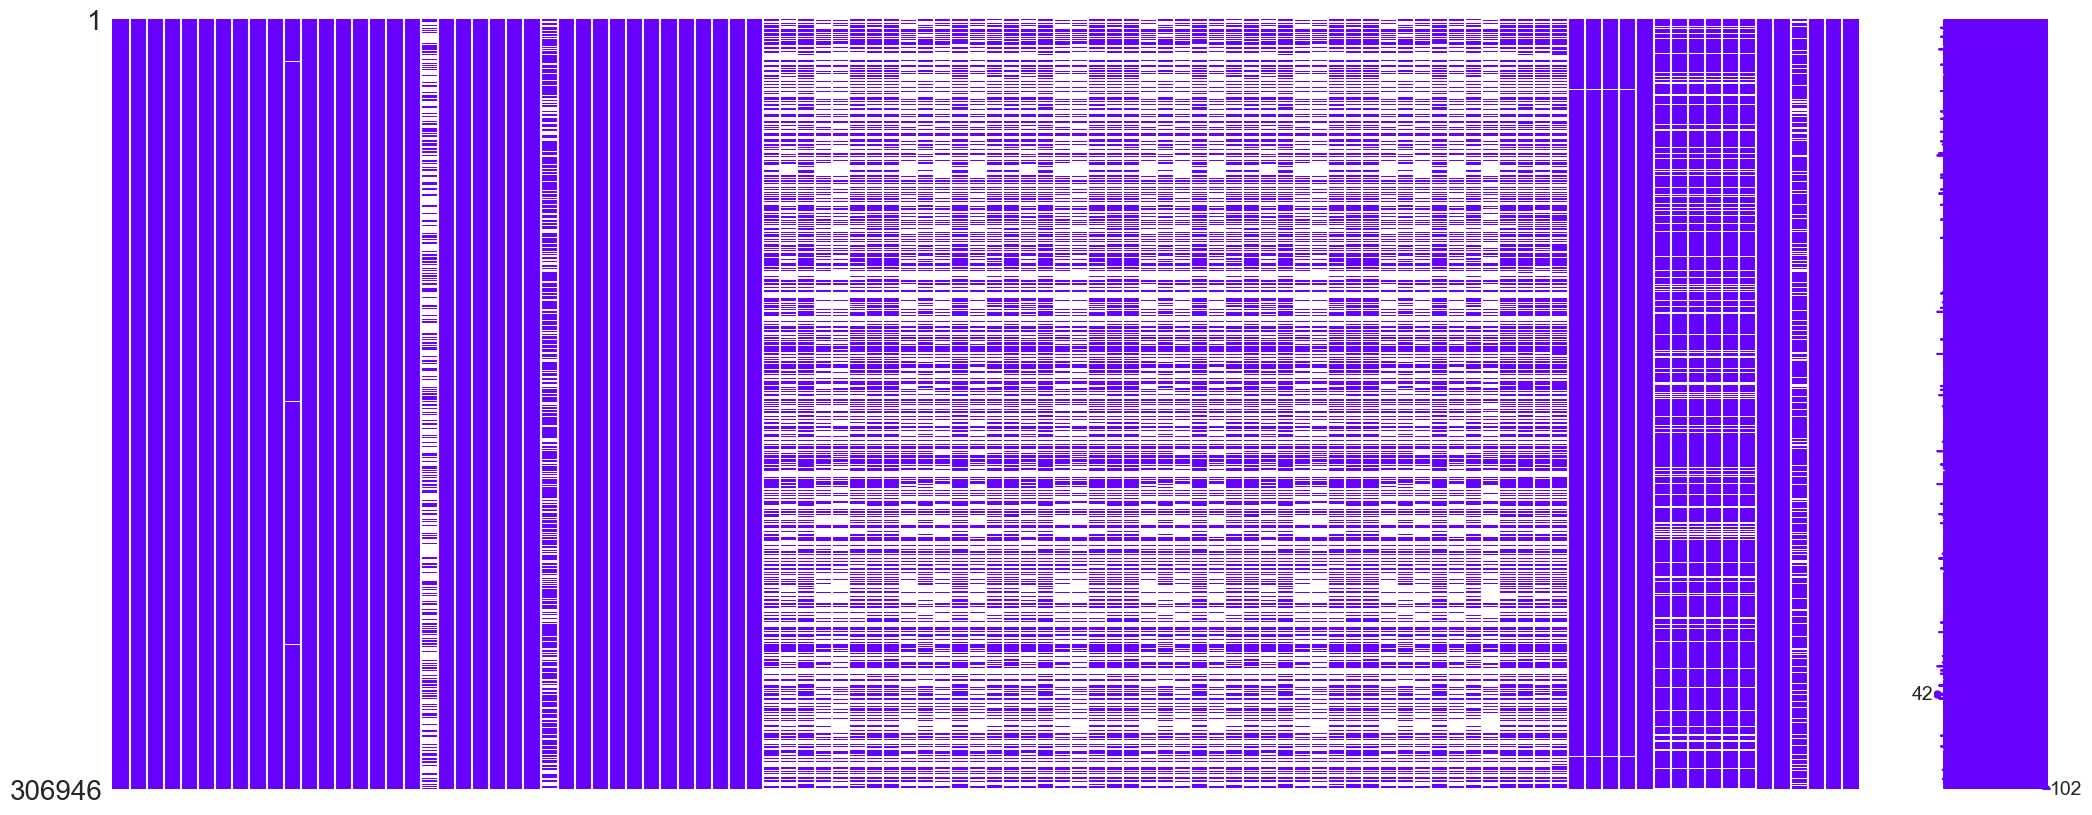

In [21]:
# Graphique des valeurs nulles

import missingno as msno
%matplotlib inline
msno.matrix(df, color=(0.4,0,1))

In [22]:
# Création d'une fonction qui permet la représentation graphique des valeurs nulles

def graph_null(df,long):


    val_nul = pd.DataFrame(round(df.isnull().sum()/df.shape[0],3),columns=['% val_nulle'])
    val_nul = val_nul.sort_values("% val_nulle", ascending=False)

    val_nul=val_nul*100

    fig, ax = plt.subplots(figsize=(12, long))

    ax.set_xlim(0, 100)
    ax.set_xlabel( "",size=0 )
    sns.barplot(x =val_nul['% val_nulle']  , y =val_nul.index ,data = val_nul , color = 'r',orient='h')
    plt.setp(ax.get_yticklabels(),fontsize = 8)
    plt.title("% de valeur manquante par colonne")

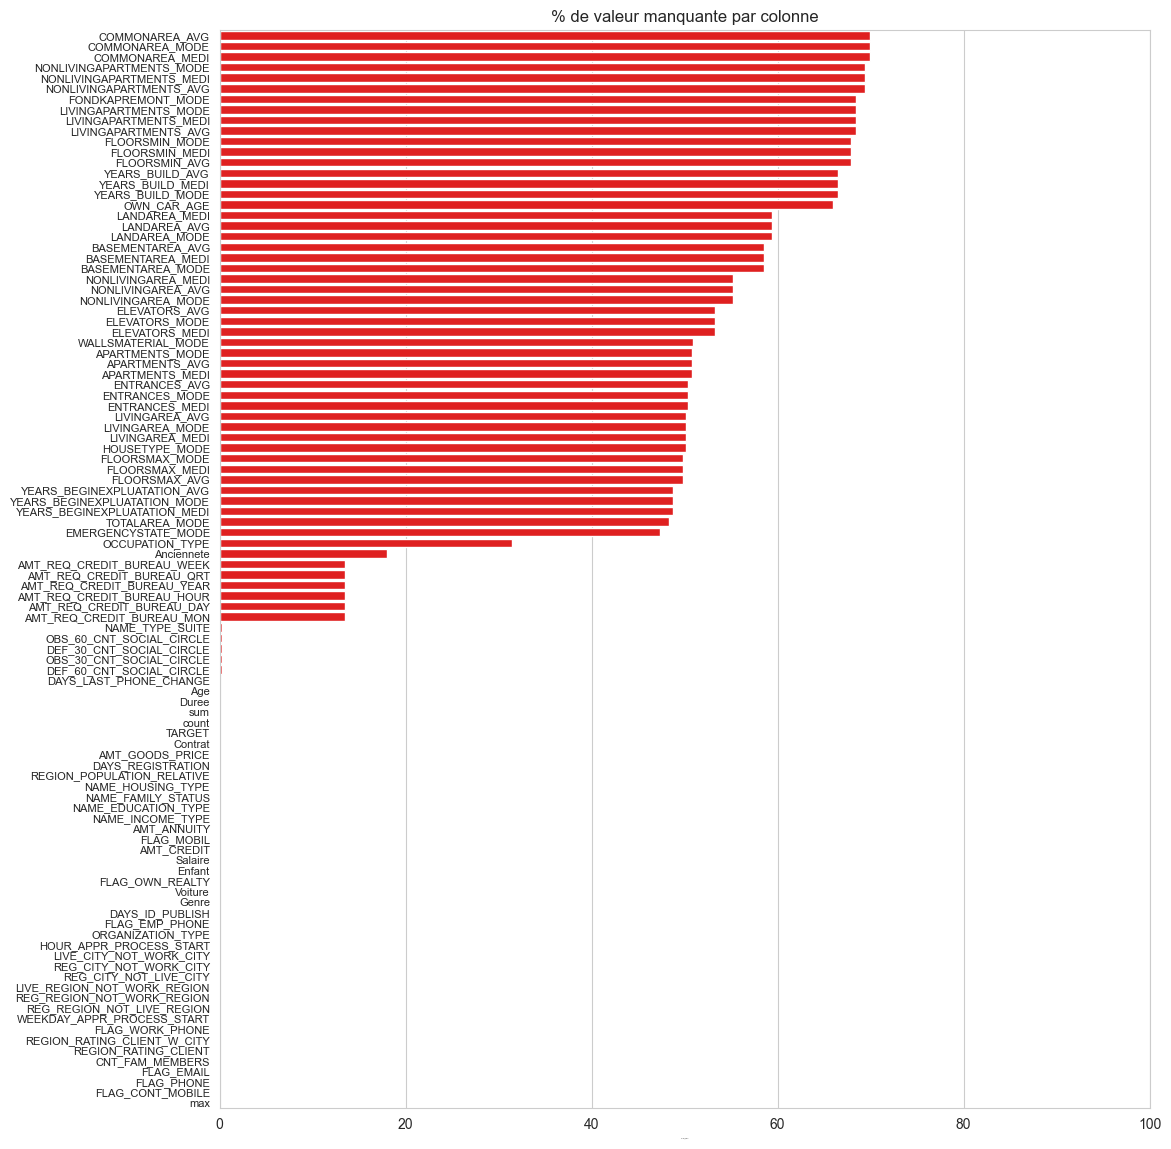

In [23]:
graph_null(df,14)

In [22]:
nb_null = df.isnull().sum().sum()
nb_null_prop = round(nb_null/(df.shape[0]*df.shape[1]),4)*100
print("Nombre total de données manquantes : ",nb_null)
print("Poucentage total de données manquantes : {:.2f}%" .format(nb_null_prop))

Nombre total de données manquantes :  8957368
Poucentage total de données manquantes : 28.61%


In [23]:
# Créer un DataFrame de booléens pour les valeurs manquantes
mv = df.isna()
# Calculer la proportion de valeurs manquantes pour chaque colonne
mp = mv.mean()
# Filtrer les colonnes avec plus de 30% de valeurs manquantes et afficher
hmc = mp[mp > 0.3].index
l=list(hmc)
l

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_

In [24]:
mp[mp > 0.3]

OWN_CAR_AGE                     0.659930
OCCUPATION_TYPE                 0.313690
APARTMENTS_AVG                  0.507614
BASEMENTAREA_AVG                0.585295
YEARS_BEGINEXPLUATATION_AVG     0.487926
YEARS_BUILD_AVG                 0.665068
COMMONAREA_AVG                  0.698804
ELEVATORS_AVG                   0.533064
ENTRANCES_AVG                   0.503610
FLOORSMAX_AVG                   0.497726
FLOORSMIN_AVG                   0.678579
LANDAREA_AVG                    0.593860
LIVINGAPARTMENTS_AVG            0.683628
LIVINGAREA_AVG                  0.502049
NONLIVINGAPARTMENTS_AVG         0.694409
NONLIVINGAREA_AVG               0.551898
APARTMENTS_MODE                 0.507614
BASEMENTAREA_MODE               0.585295
YEARS_BEGINEXPLUATATION_MODE    0.487926
YEARS_BUILD_MODE                0.665068
COMMONAREA_MODE                 0.698804
ELEVATORS_MODE                  0.533064
ENTRANCES_MODE                  0.503610
FLOORSMAX_MODE                  0.497726
FLOORSMIN_MODE  

In [25]:
# Suppression des colonnes qui ont plus de 40% de valeurs manquantes

for X in list(df.columns):
    if (df[X].isnull().sum()/df.shape[0]) > 0.4 :
        df = df.drop(columns=[X])

In [26]:
df.shape

(306946, 54)

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">1.3 Features  engineering</div>
<a class="anchor" id="Section_1.1"></a>

### Encoder sur variables catégorielles

In [27]:
from sklearn.preprocessing import LabelEncoder

df["Anciennete"] = df["Anciennete"].fillna(0)

# LabelEncoder fonctionne uniquement avec des var de type STR
categorical_vars = df.select_dtypes(include='object')
df[categorical_vars.columns] = categorical_vars.astype(str)


# Création d'un dictionaire contenant en key les noms de variable
# et en valeur un dictionnaire en key les modalities et leur encoder

categ_map = {}
le = LabelEncoder()

for col in categorical_vars:
    df[col] = df[col].fillna(-1)
    df[col] = le.fit_transform(df[col])
    # Création d'un dictionnaire contenant les labels
    categ_map[col] = dict(zip( le.classes_,
                              le.transform(le.classes_))
                          )
    categ_map[col]['missing'] = -1

### Création de nouvelles variables

In [28]:
# Permet d'obtenir des informations non linéaires entre les variables

df["ANCxCRED"] = df["Anciennete"] * df["AMT_CREDIT"]
df["ANC_par_CRED"] = df["Anciennete"] / df["AMT_CREDIT"]
df['Anc_Age'] = df['Anciennete'] / df['Age']
df['Salaire_PER_PERSON'] = df['Salaire'] / df['CNT_FAM_MEMBERS']
df['Annuite_Salaire'] = df['AMT_ANNUITY'] / df['Salaire']
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

### Imputation des données manquantes par Itérative-Imputer

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=5, random_state=0)
df_imp = imp.fit_transform(df)
df = pd.DataFrame(df_imp,columns=df.columns, index=df.index)

<Axes: >

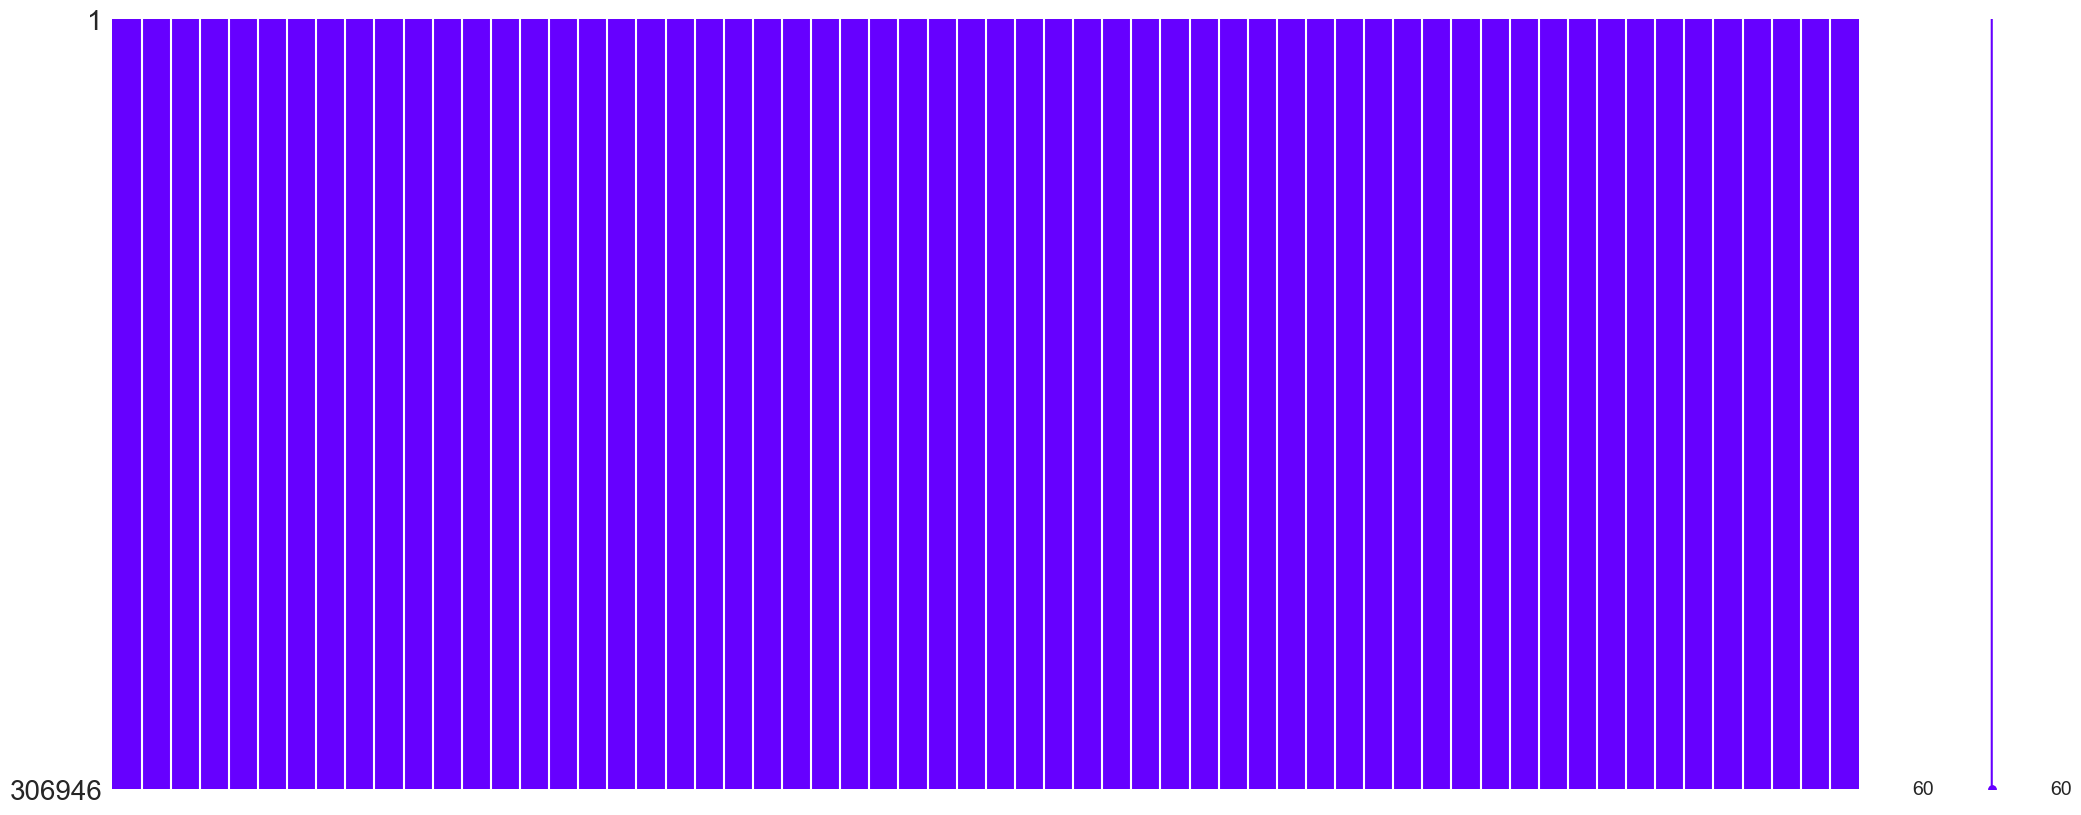

In [28]:
# Graphique des valeurs nulles
import missingno as msno
%matplotlib inline
msno.matrix(df, color=(0.4,0,1))

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">1.4 Création  des données pour Streamlit</div>
<a class="anchor" id="Section_1.1"></a>

In [30]:
# Création d'un échant du df pour streamlit
df_streamlit = df.sample(frac=0.01)

In [30]:
# Transfert du dictionnaire vers le script streamlit
# dictionnaire est crée dans le parag Encoder en 1.3

import pickle
dictionnaire = categ_map
with open('dictionnaire.pickle', 'wb') as fichier:
    pickle.dump(dictionnaire, fichier)

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">1.5 Analyse en composantes principales & Heatmap</div>
<a class="anchor" id="Section_1.1"></a>

### Données centées réduites et ACP

In [31]:
# Instanciation
sc=StandardScaler()

# ACP sur données centrées-reduites
Z=sc.fit_transform(df)
Z = pd.DataFrame(Z,columns=df.columns,index=df.index)

In [32]:
p=Z.shape[1]
n=Z.shape[0]

In [33]:
# Calculs des composantes principales
from sklearn.decomposition import PCA
acp=PCA(svd_solver='full')
coord1 = acp.fit_transform(Z)

In [34]:
# Nous reccuperons les données de la variable qualitative
import numpy as np
Quali=df['TARGET']
modalites=np.unique(df['TARGET'])

In [35]:
# proportion de variance expliquée
print(acp.explained_variance_ratio_[0:5])

[0.08062504 0.06914478 0.05320628 0.04754776 0.04172755]


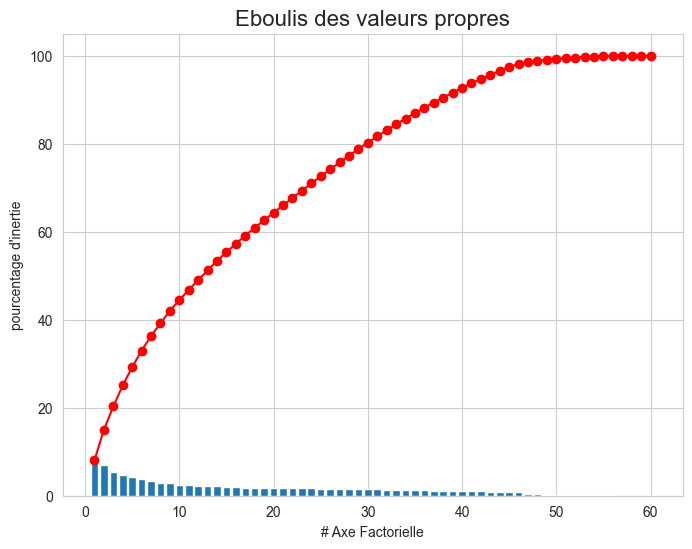

In [36]:
#Variances expliquées
varexpl = acp.explained_variance_ratio_*100

#Projection de l'éboulis des valeurs propres
plt.figure(figsize=(8,6))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("# Axe Factorielle")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres",fontsize=16)
plt.show(block=False)

****
#### Variance Expliquée
>La première composante accapare `9,64%` de l'information disponible.
Nous disposons de `17,54%` ac les 2 premiers facteurs
>
****

### Cercle des corrélations

In [37]:
# Contribution des individus dans l'inertie totale
di=np.sum(Z**2,axis=1)
df_di = pd.DataFrame({'d_i':di})

# qualité de la représentation des individus  COS2
cos2=coord1**2
for j in range(p):
    cos2[:,j]=cos2[:,j]/di

# valeur corrigée
eigval = (n-1)/n*acp.explained_variance_

# Contribution aux axes
ctr=coord1**2
for j in range(p):
    ctr[:,j]=ctr[:,j]/(n*eigval[j])

df_cnt = pd.DataFrame({'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})

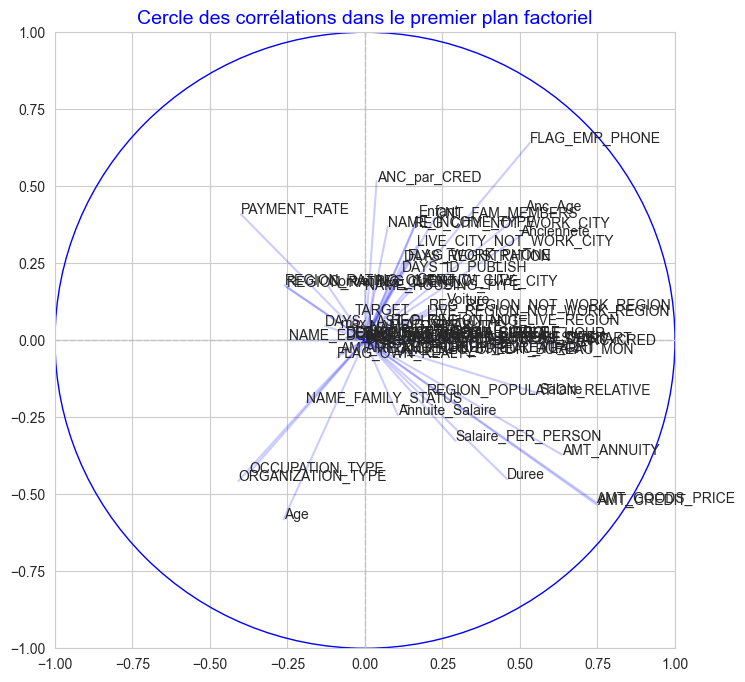

In [38]:
# racine carré des valeurs propres
sqrt_eigval = np.sqrt(eigval)

# corrélation des variables avec les axes
corvar = np.zeros((p,p ))
for k in range(p):
    corvar[: , k] = acp.components_[k, :]*sqrt_eigval[k]

# cercle des correlations
fig,axes=plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# Affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(df.columns[j],(corvar[j,0],corvar[j,1]),fontsize=10)
    plt.plot([0,corvar[j,0]],[0,corvar[j,1]],color='blue',alpha=0.2)

# ajouter les deux axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

# Ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.title('Cercle des corrélations dans le premier plan factoriel',fontsize=14,color='b')

# affichage
plt.show()

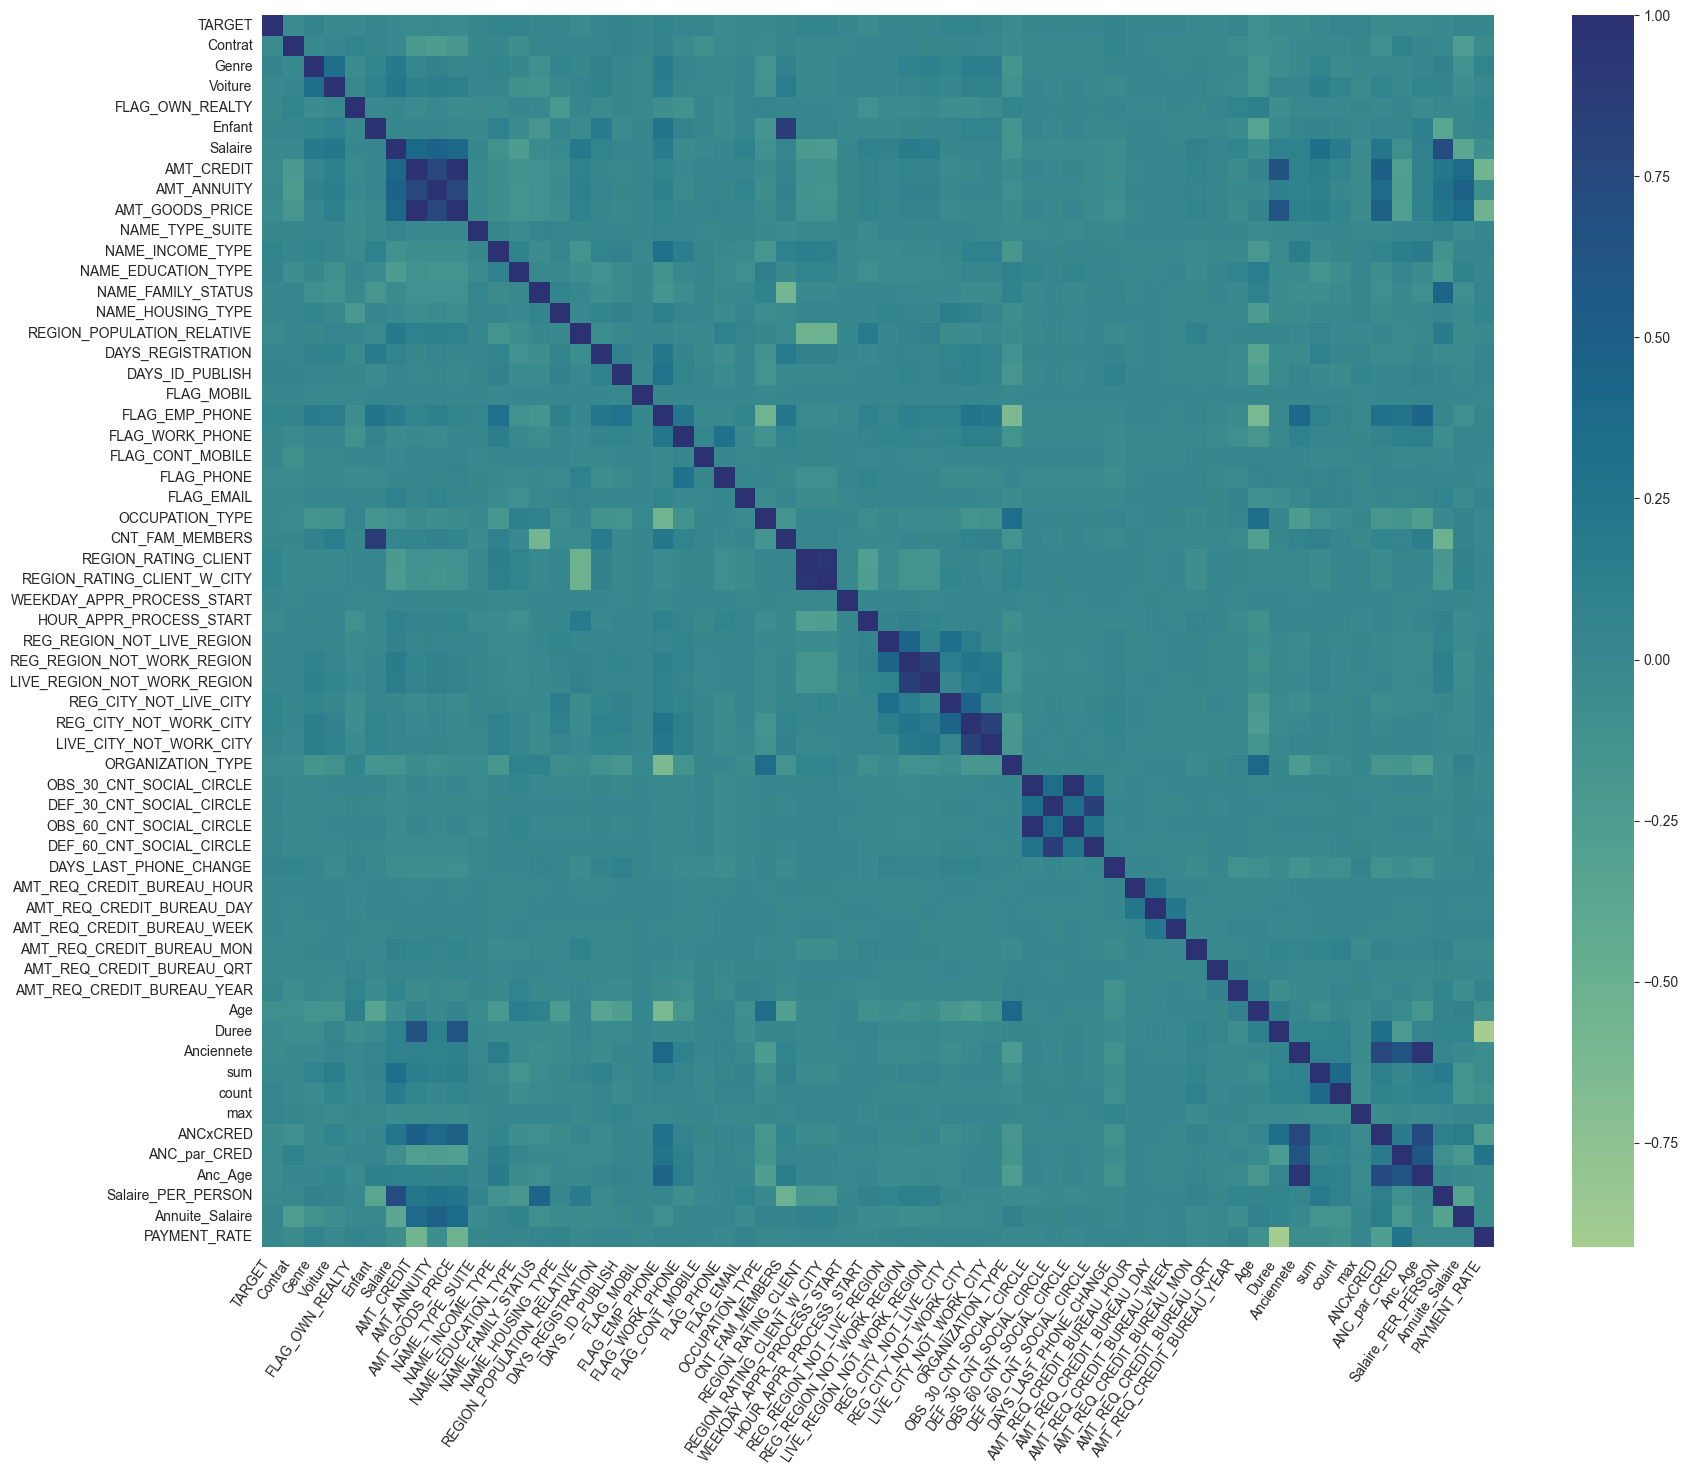

In [39]:
# Matrice de corrélation & heatmap

df_corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(df_corr, annot=False,cmap="crest",square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha="right")
plt.show()

In [40]:
# Suppression des variables corrélées sup 0.75

from scipy.stats import pearsonr

corr, _ = pearsonr(df["sum"], df["count"])
print('sum et count Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(df["AMT_REQ_CREDIT_BUREAU_DAY"], df["AMT_REQ_CREDIT_BUREAU_WEEK"])
print('crédit_bureau_j et crédit_bureau_m Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(df["OBS_30_CNT_SOCIAL_CIRCLE"], df["OBS_60_CNT_SOCIAL_CIRCLE"])
print('obs 30j et obs 60j Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(df["DEF_30_CNT_SOCIAL_CIRCLE"], df["DEF_60_CNT_SOCIAL_CIRCLE"])
print('def 30 et def 60 Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(df["REG_CITY_NOT_LIVE_CITY"], df["REG_CITY_NOT_WORK_CITY"])
print('not live et not work Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(df["REGION_RATING_CLIENT"], df["REGION_RATING_CLIENT_W_CITY"])
print('region rate et city rate Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(df["AMT_GOODS_PRICE"], df["AMT_CREDIT"])
print('bien et credit Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(df["AMT_CREDIT"], df["AMT_ANNUITY"])
print('credit  et annuité Pearsons correlation: %.3f' % corr)

corr, _ = pearsonr(df["Enfant"], df["CNT_FAM_MEMBERS"])
print('enfant et nbre de mmnbre Pearsons correlation: %.3f' % corr)

sum et count Pearsons correlation: 0.391
crédit_bureau_j et crédit_bureau_m Pearsons correlation: 0.219
obs 30j et obs 60j Pearsons correlation: 0.998
def 30 et def 60 Pearsons correlation: 0.860
not live et not work Pearsons correlation: 0.440
region rate et city rate Pearsons correlation: 0.951
bien et credit Pearsons correlation: 0.987
credit  et annuité Pearsons correlation: 0.770
enfant et nbre de mmnbre Pearsons correlation: 0.878


In [41]:
# Suppression des variables colinéaires

list_features_sup = ["AMT_REQ_CREDIT_BUREAU_WEEK",
                     "OBS_60_CNT_SOCIAL_CIRCLE",
                     "DEF_60_CNT_SOCIAL_CIRCLE",
                     "REGION_RATING_CLIENT",
                     "AMT_GOODS_PRICE",
                     "AMT_ANNUITY",
                     "Enfant"]

df.drop(columns=list_features_sup,inplace=True)
Z.drop(columns=list_features_sup,inplace=True)

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">2) Modélisation : classifieur binaire</div>
<a class="anchor" id="Section_1.1"></a>

### Sélection des 30 meilleurs features au sens du Khi-2

In [53]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

y = df[["TARGET"]]

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized.drop("TARGET",axis=1,inplace=True)

# Sélection des K meilleures variables à l'aide de chi2
selector = SelectKBest(chi2, k=30)
X_selected =selector.fit_transform(df_normalized, y)

X_selected = pd.DataFrame(data = X_selected,
                          columns = selector.get_feature_names_out(),
                          index = df.index)

# Suppression des colonnes dans le df pr streamlit
col=list(X_selected.columns)
col.append("TARGET")
df_streamlit = df_streamlit[col]
df_streamlit.to_csv("df_streamlit.csv", sep=",")

X_selected

Contrat  Genre  Voiture  AMT_CREDIT  NAME_INCOME_TYPE  \
SK_ID_CURR                                                          
100002          0.0    0.5      0.0    0.119316          1.000000   
100003          0.0    0.0      0.0    0.411968          0.571429   
100004          1.0    0.5      1.0    0.029697          1.000000   
100006          0.0    0.0      0.0    0.088327          1.000000   
100007          0.0    0.5      0.0    0.154426          1.000000   
...             ...    ...      ...         ...               ...   
456251          0.0    0.5      0.0    0.069195          1.000000   
456252          0.0    0.0      0.0    0.074095          0.428571   
456253          0.0    0.0      0.0    0.208760          1.000000   
456254          0.0    0.0      0.0    0.107276          0.142857   
456255          0.0    0.0      0.0    0.207881          0.142857   

            NAME_EDUCATION_TYPE  NAME_HOUSING_TYPE  \
SK_ID_CURR                                           
100002                     1.00                0.2   
100003                     0.25                0.2   
100004                     1.00                0.2   
100006                     1.00                0.2   
100007                     1.00                0.2   
...                         ...                ...   
456251                     1.00                1.0   
456252                     1.00                0.2   
456253                     0.25                0.2   
456254                     1.00                0.2   
456255                     0.25                0.2   

            REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
SK_ID_CURR                                                                   
100002                        0.256321           0.852140         0.705433   
100003                        0.045016           0.951929         0.959566   
100004                        0.134897           0.827335         0.648326   
100006                        0.107023           0.601451         0.661387   
100007                        0.392880           0.825268         0.519522   
...                                ...                ...              ...   
456251                        0.446855           0.657263         0.724607   
456252                        0.344429           0.822147         0.431708   
456253                        0.065247           0.726937         0.284424   
456254                        0.069553           0.896158         0.870641   
456255                        0.635991           0.792153         0.943032   

            ...  DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE       Age  \
SK_ID_CURR  ...                                                               
100002      ...                  0.058824                0.735788  0.111161   
100003      ...                  0.000000                0.807083  0.522886   
100004      ...                  0.000000                0.810112  0.651466   
100006      ...                  0.000000                0.856244  0.649154   
100007      ...                  0.000000                0.742311  0.701409   
...         ...                       ...                     ...       ...   
456251      ...                  0.000000                0.936393  0.103608   
456252      ...                  0.000000                1.000000  0.748929   
456253      ...                  0.000000                0.555219  0.421477   
456254      ...                  0.000000                0.924977  0.252086   
456255      ...                  0.000000                0.816636  0.528016   

               Duree  Anciennete    count       max  ANCxCRED  ANC_par_CRED  \
SK_ID_CURR                                                                    
100002      0.226047    0.035563  0.06250  0.964750  0.006649      0.006116   
100003      0.756604    0.066324  0.03125  0.792608  0.039450      0.003585   
100004      0.321005    0.012561  0.00000  1.000000 

In [45]:
list(X_selected.columns)

['Contrat',
 'Genre',
 'Voiture',
 'AMT_CREDIT',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'Age',
 'Duree',
 'Anciennete',
 'count',
 'max',
 'ANCxCRED',
 'ANC_par_CRED',
 'Anc_Age']

In [43]:
df_streamlit.loc[312988].to_dict()

KeyError: 312988

In [55]:
df_streamlit.to_csv("df_streamlit.csv", sep=",")

In [108]:
df_streamlit

Contrat  Genre  Voiture  AMT_CREDIT  NAME_INCOME_TYPE  \
SK_ID_CURR                                                          
264838          0.0    0.0      0.0    414792.0               3.0   
229957          0.0    1.0      1.0    296280.0               7.0   
100295          0.0    1.0      1.0   1019205.0               1.0   
183308          0.0    1.0      0.0    612612.0               3.0   
199019          0.0    0.0      1.0    630747.0               7.0   
...             ...    ...      ...         ...               ...   
182930          0.0    1.0      1.0    396171.0               7.0   
417826          0.0    0.0      0.0    879480.0               3.0   
134431          0.0    0.0      1.0    257391.0               4.0   
227543          0.0    1.0      1.0    777024.0               1.0   
353558          0.0    0.0      0.0    254700.0               3.0   

            NAME_EDUCATION_TYPE  NAME_HOUSING_TYPE  \
SK_ID_CURR                                           
264838                      4.0                1.0   
229957                      4.0                1.0   
100295                      4.0                1.0   
183308                      4.0                1.0   
199019                      4.0                1.0   
...                         ...                ...   
182930                      4.0                1.0   
417826                      4.0                1.0   
134431                      4.0                1.0   
227543                      4.0                1.0   
353558                      4.0                1.0   

            REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
SK_ID_CURR                                                                   
264838                        0.010966           -13269.0          -4578.0   
229957                        0.010643            -2964.0          -4849.0   
100295                        0.072508             -335.0          -3224.0   
183308                        0.072508              -56.0          -2245.0   
199019                        0.022625            -2065.0            -81.0   
...                                ...                ...              ...   
182930                        0.020246            -7129.0          -1590.0   
417826                        0.035792            -5023.0          -1516.0   
134431                        0.025164            -7864.0          -2443.0   
227543                        0.008575            -3282.0          -2850.0   
353558                        0.009657            -2778.0          -4064.0   

            ...  DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE        Age  \
SK_ID_CURR  ...                                                                
264838      ...                       1.0                 -1157.0  61.983562   
229957      ...                       0.0                     0.0  33.504110   
100295      ...                       0.0                   -14.0  31.112329   
183308      ...                       0.0                 -1651.0  51.232877   
199019      ...                       0.0                     0.0  57.523288   
...         ...                       ...                     ...        ...   
182930      ...                       0.0                 -1097.0  24.391781   
417826      ...                       0.0                 -1515.0  59.528767   
134431      ...                       0.0                 -2282.0  51.778082   
227543      ...                       0.0                  -745.0  28.043836   
353558      ...                       0.0                  -628.0  67.767123   

                Duree  Anciennete  count     max      ANCxCRED  ANC_par_CRED  \
SK_ID_CURR                                                                     
264838      22.542431    0.000000    1.0   -86.0  0.000000e+00      0.000000   
229957      12.586504    7.994521    1.0  -821.0  2.368617e+06      0.000027   
100295      32.843677    1.649315  

Colonne1 Colonne2  Colonne3
10         1        A      True
20         2        B     False
30         3        C      True
40         4        D     False
50         5        E      True

### Séparation des données en train-set et test-set

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_selected,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# CRéation d'une copie pour le pipeline
X_train_pl = X_train.copy()
y_train_pl = y_train.copy()

### Oversampling sur le train-set

In [58]:
# Création de nouvelles données artificiellement, target=1 => 0.08 / 0.3

from imblearn.over_sampling import SMOTE

print("Classe 0:", sum(y.TARGET == 0),"Classe 1:", sum(y.TARGET == 1))

# Calculer le nombre d'échantillons à synthétiser pour la classe 0
desired_ratio = 0.3
num_samples_1 = int(desired_ratio * sum(y_train.TARGET == 1))

smote = SMOTE(sampling_strategy= 0.3 , random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Classe 0:", sum(y_train.TARGET == 0),"Classe 1:", sum(y_train.TARGET == 1))

Classe 0: 282157 Classe 1: 24789
Classe 0: 225725 Classe 1: 67717


### Création d'une métrique fonction de coût

In [59]:
from sklearn.metrics import confusion_matrix

def metric_cost_error (y_true, y_proba,cost_fn = 10,cost_fp = 1):

    range_values = np.arange(0.10, 0.95, 0.02)

    # Création du DataFrame pour stocker les résultats
    df = pd.DataFrame(columns=['P', 'False Positives', 'False Negatives', 'Total Cost','misclassification_rate'])

    # Parcourir les valeurs du range
    for p in range_values:
        # Calcul de la matrice de confusion
        y_pred = (y_proba >= p).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        misclassification_rate = 1 - (tp + tn) / (tp + tn + fp + fn)

        # Calcul du coût total d'erreur
        total_cost = fp * cost_fp + fn * cost_fn

        # Ajout des résultats au DataFrame
        df = df.append( {'P': p,
                        'False Positives': fp,
                        'False Negatives': fn,
                        'Total Cost': total_cost,
                        'misclassification_rate': misclassification_rate },
                       ignore_index=True)

    # Tracer le graphique des résultats
    plt.plot(df['P'], df['Total Cost'], marker='o')
    plt.xlabel('P')
    plt.ylabel('Total Cost')
    plt.title("Fonction du coût d'erreur")
    plt.grid(True)
    plt.show()

    plt.plot(df['P'], df['misclassification_rate'], marker=',')
    plt.xlabel('P')
    plt.ylabel('Taux de mal classé')
    plt.title('Taux de mal classé')
    plt.grid(True)
    plt.show()

    return df

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">2.1 Régression logistique</div>
<a class="anchor" id="Section_1.1"></a>

In [48]:
# Importation des bibliothèques nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import mlflow
import mlflow.sklearn
import mlflow.tracking as tracking


mlflow.set_experiment("Reg_Logistic_Models")
mlflow.sklearn.autolog()

with mlflow.start_run(run_name = 'reg_logistic_defaut'):

    # Création d'un classifieur de régression logistique
    logreg = LogisticRegression(class_weight='balanced',fit_intercept=True)

    # Définition de la grille de recherche des hyperparamètres
    param_grid = {
        'penalty': ['l2'],
        'C': (0.2, 0.5, 0.8),
        'solver': ['newton-cholesky'] }

    # Création de l'objet GridSearchCV
    grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='balanced_accuracy')

    # Ajustement du modèle sur l'ensemble d'apprentissage
    grid_search.fit(X_train, y_train)
    mlflow.end_run()
   # mlflow.sklearn.log_model(grid_search, "model")

2023/06/14 11:36:06 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


In [72]:
from pyngrok import ngrok
# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2QH4TNhGpPVBJInkV1WUy0a5i06_5TwFeF9BgaFK74TKK2Yg"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

t=2023-06-19T09:48:26+0200 lvl=warn msg="ngrok config file found at legacy location, move to XDG location" xdg_path=C:\\Users\\fbbou\\AppData\\Local/ngrok/ngrok.yml legacy_path=C:\\Users\\fbbou\\.ngrok2\\ngrok.yml


MLflow Tracking UI: https://1ee3-2a02-a03f-6a8b-8001-746b-9e23-b112-1532.ngrok-free.app


In [49]:
# Affichage des meilleurs paramètres trouvés
print("Meilleurs paramètres trouvés:", grid_search.best_params_)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Affichage des résultats
print("Rapport de classification:\n", classification_report(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))

Meilleurs paramètres trouvés: {'C': 0.8, 'penalty': 'l2', 'solver': 'newton-cholesky'}
Rapport de classification:
               precision    recall  f1-score   support

         0.0       0.95      0.63      0.76     56432
         1.0       0.13      0.64      0.22      4958

    accuracy                           0.63     61390
   macro avg       0.54      0.63      0.49     61390
weighted avg       0.89      0.63      0.71     61390

Matrice de confusion:
 [[35534 20898]
 [ 1805  3153]]


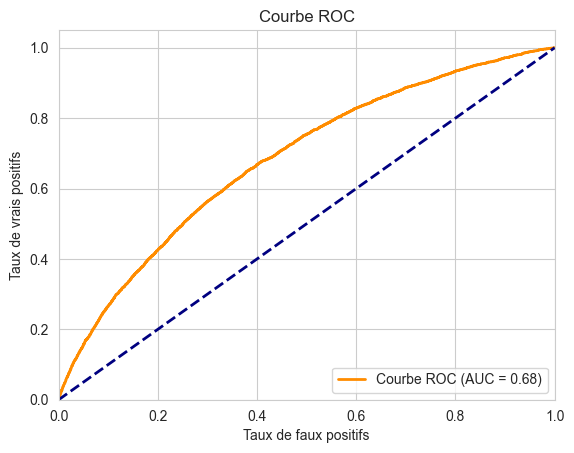

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Prédire les probabilités de classe pour les données d'entraînement
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

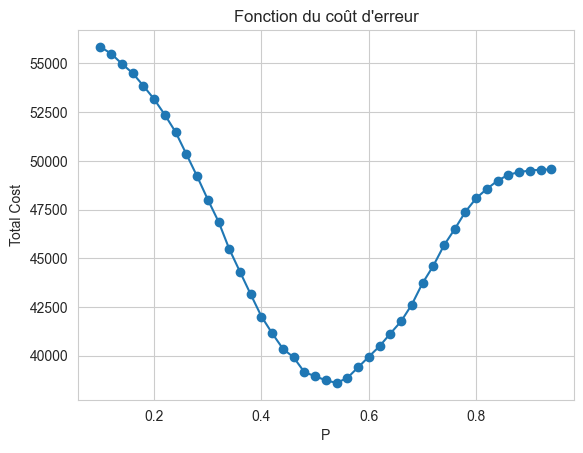

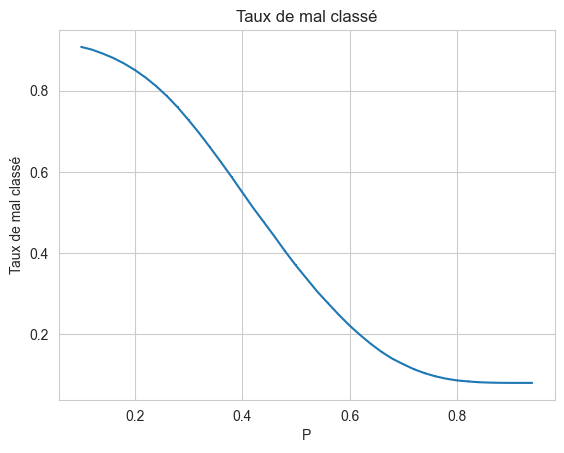

P  False Positives  False Negatives  Total Cost  misclassification_rate
0   0.10          55725.0             12.0     55845.0                0.907917
1   0.12          55308.0             19.0     55498.0                0.901238
2   0.14          54709.0             27.0     54979.0                0.891611
3   0.16          54010.0             49.0     54500.0                0.880583
4   0.18          53158.0             69.0     53848.0                0.867030
5   0.20          52145.0            102.0     53165.0                0.851067
6   0.22          50969.0            139.0     52359.0                0.832513
7   0.24          49596.0            188.0     51476.0                0.810946
8   0.26          48056.0            229.0     50346.0                0.786529
9   0.28          46290.0            292.0     49210.0                0.758788
10  0.30          44313.0            370.0     48013.0                0.727855
11  0.32          42227.0            465.0     46877.0                0.695423
12  0.34          40013.0            546.0     45473.0                0.660678
13  0.36          37712.0            659.0     44302.0                0.625037
14  0.38          35332.0            781.0     43142.0                0.588255
15  0.40          32859.0            915.0     42009.0                0.550155
16  0.42          30385.0           1076.0     41145.0                0.512478
17  0.44          28054.0           1230.0     40354.0                0.477016
18  0.46          25681.0           1423.0     39911.0                0.441505
19  0.48          23243.0           1591.0     39153.0                0.404528
20  0.50          20898.0           1805.0     38948.0                0.369816
21  0.52          18714.0           2002.0     38734.0                0.337449
22  0.54          16533.0           2207.0     38603.0                0.305261
23  0.56          14552.0           2431.0     38862.0                0.276641
24  0.58          12563.0           2684.0     39403.0                0.248363
25  0.60          10699.0           2925.0     39949.0                0.221925
26  0.62           9028.0           3146.0     40488.0                0.198306
27  0.64           7457.0           3368.0     41137.0                0.176332
28  0.66           6051.0           3571.0     41761.0                0.156736
29  0.68           4821.0           3780.0     42621.0                0.140104
30  0.70           3790.0           3993.0     43720.0                0.126780
31  0.72           2848.0           4176.0     44608.0                0.114416
32  0.74           2064.0           4360.0     45664.0                0.104642
33  0.76           1447.0           4505.0     46497.0                0.096954
34  0.78            951.0           4644.0     47391.0                0.091139
35  0.80            583.0           4750.0     48083.0                0.086871
36  0.82            363.0           4820.0     48563.0                0.084427
37  0.84            184.0           4880.0     48984.0                0.082489
38  0.86             84.0           4920.0     49284.0                0.081512
39  0.88             33.0           4939.0     49423.0                0.080990
40  0.90             13.0           4949.0     49503.0                0.080827
41  0.92              6.0           4954.0     49546.0                0.080795
42  0.94              0.0           4956.0     49560.0                0.080730

In [51]:
metric_cost_error (y_test, y_pred_proba,cost_fn = 10,cost_fp = 1)

#### Interprétation
La fonction de coût atteind son minimum pour une probabilité d'affectation d'une classe à l'autre de 0.2, ce qui représente ce qui représente environ 33 % de mal classé, il s'agit concrètement d'être extrêment sévère quant à l'optention d'un crédit

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">2.2 XGBoost</div>
<a class="anchor" id="Section_1.1"></a>

In [61]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
import mlflow


mlflow.set_experiment("XGBoost_Models")
mlflow.sklearn.autolog()

with mlflow.start_run(run_name = 'XGBoost_defaut'):
    xgb_model = xgb.XGBClassifier()

    params = {
        'n_estimators' : [80],
        'objective': ['binary:logistic'],
        'eval_metric': ['auc'],
        'learning_rate': [0.05],
        'max_depth': [15],
        'min_child_weight': [6],
        'gamma': [1],
        'scale_pos_weight': [4],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'alpha': [0.3],
        'lambda': [0.3] }

    grid_search = GridSearchCV(xgb_model, params, cv=5, scoring='balanced_accuracy')
    grid_search.fit(X_train, y_train)
    mlflow.end_run()

2023/06/18 22:03:23 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
             ...`
2023/06/18 22:08:00 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


In [62]:
best_model_XGB = grid_search.best_estimator_
best_params_XGB = grid_search.best_params_

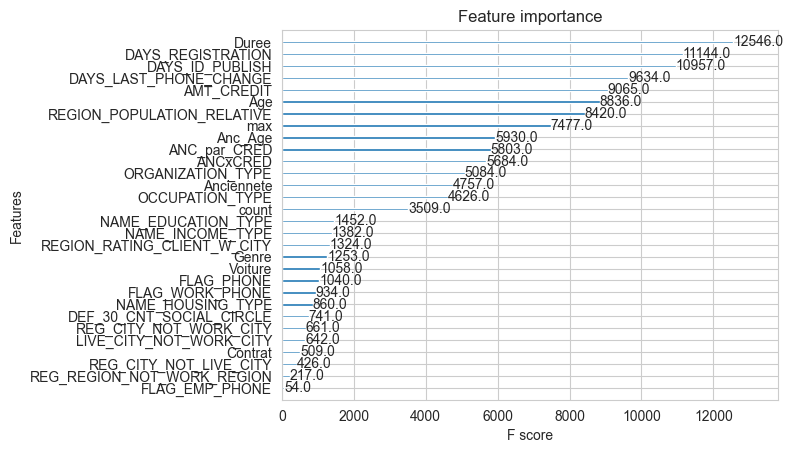

In [63]:
import matplotlib.pyplot as plt

xgb.plot_importance(best_model_XGB)
plt.show()

In [64]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Prédiction des labels pour les données de test
y_pred = best_model_XGB.predict(X_test)

# Calcul de l'accuracy et de l'AUC
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, best_model_XGB.predict_proba(X_test)[:,1])

print(confusion_matrix(y_test, y_pred))
print("Accuracy : {:.2f}%".format(accuracy*100))
print("AUC : {:.2f}".format(auc))

[[53519  2913]
 [ 4095   863]]
Accuracy : 88.58%
AUC : 0.69


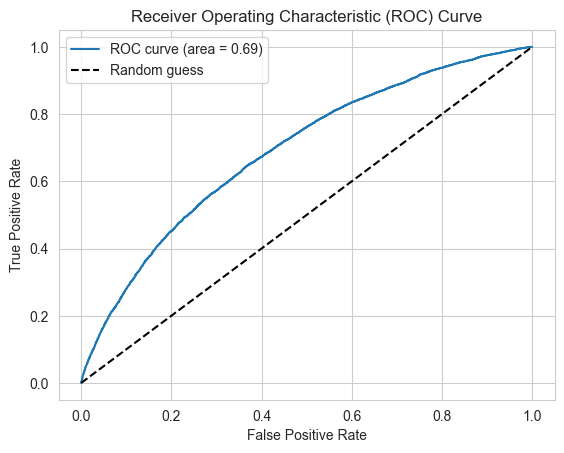

In [56]:
 from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prédiction des labels pour les données de test et calcul des probabilités associées
y_pred = best_model_XGB.predict(X_test)
y_prob = best_model_XGB.predict_proba(X_test)[:,1]

# Calcul de l'accuracy et de l'AUC
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Création du graphique de la courbe ROC
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

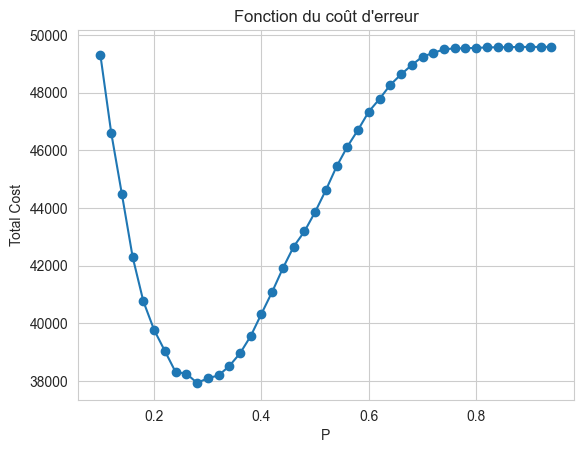

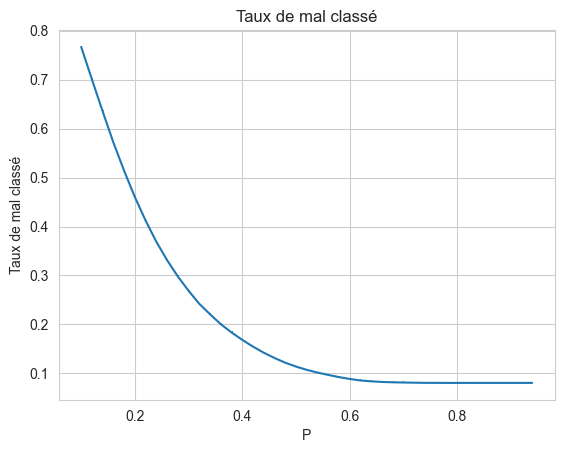

P  False Positives  False Negatives  Total Cost  misclassification_rate
0   0.10          46815.0            247.0     49285.0                0.766607
1   0.12          42592.0            402.0     46612.0                0.700342
2   0.14          38371.0            610.0     44471.0                0.634973
3   0.16          34269.0            803.0     42299.0                0.571298
4   0.18          30512.0           1025.0     40762.0                0.513716
5   0.20          26963.0           1281.0     39773.0                0.460075
6   0.22          23765.0           1528.0     39045.0                0.412005
7   0.24          20905.0           1741.0     38315.0                0.368887
8   0.26          18351.0           1991.0     38261.0                0.331357
9   0.28          16118.0           2182.0     37938.0                0.298094
10  0.30          14111.0           2399.0     38101.0                0.268936
11  0.32          12277.0           2592.0     38197.0                0.242206
12  0.34          10783.0           2774.0     38523.0                0.220834
13  0.36           9362.0           2960.0     38962.0                0.200717
14  0.38           8134.0           3143.0     39564.0                0.183694
15  0.40           7026.0           3331.0     40336.0                0.168708
16  0.42           5997.0           3510.0     41097.0                0.154862
17  0.44           5058.0           3686.0     41918.0                0.142434
18  0.46           4241.0           3842.0     42661.0                0.131666
19  0.48           3526.0           3966.0     43186.0                0.122039
20  0.50           2913.0           4095.0     43863.0                0.114155
21  0.52           2372.0           4225.0     44622.0                0.107460
22  0.54           1900.0           4354.0     45440.0                0.101873
23  0.56           1496.0           4463.0     46126.0                0.097068
24  0.58           1130.0           4558.0     46710.0                0.092654
25  0.60            800.0           4654.0     47340.0                0.088842
26  0.62            540.0           4724.0     47780.0                0.085747
27  0.64            366.0           4790.0     48266.0                0.083988
28  0.66            238.0           4839.0     48628.0                0.082701
29  0.68            154.0           4880.0     48954.0                0.082000
30  0.70             93.0           4915.0     49243.0                0.081577
31  0.72             51.0           4932.0     49371.0                0.081170
32  0.74             17.0           4948.0     49497.0                0.080876
33  0.76              9.0           4952.0     49529.0                0.080811
34  0.78              2.0           4953.0     49532.0                0.080713
35  0.80              0.0           4955.0     49550.0                0.080713
36  0.82              0.0           4956.0     49560.0                0.080730
37  0.84              0.0           4957.0     49570.0                0.080746
38  0.86              0.0           4957.0     49570.0                0.080746
39  0.88              0.0           4958.0     49580.0                0.080762
40  0.90              0.0           4958.0     49580.0                0.080762
41  0.92              0.0           4958.0     49580.0                0.080762
42  0.94              0.0           4958.0     49580.0                0.080762

In [57]:
metric_cost_error (y_test, y_prob,cost_fn = 10,cost_fp = 1)

#### Interprétation
La fonction de coût atteind son minimum pour une probabilité d'affectation d'une classe à l'autre de 0.2, ce qui représente ce qui représente environ 33 % de mal classé, il s'agit concrètement d'être extrêment sévère quant à l'optention d'un crédit

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">2.3 Réseau de neurones</div>
<a class="anchor" id="Section_1.1"></a>

### Création de 3 sets : Train, Val et Test

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.1, random_state=42, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

smote = SMOTE(sampling_strategy= 0.3 , random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

2023/06/06 13:55:16 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ae94f7f1bc244594b78adb8b1543e8ea', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/06/06 13:55:16 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2023/06/06 13:55:16 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not specify a `predict` function, which is required in order to infer the signature
2023/06/06 13:55:16 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [99]:
print(len(X_train.columns),len(X_val.columns),len(X_test.columns))

30 30 30


In [63]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Créer un modèle séquentiel
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train.shape[1],) ),

        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.3),

        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               13568     
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 112,385
Trainable params: 112,385
Non-trai

In [64]:
from livelossplot.inputs.keras import PlotLossesCallback
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.Accuracy(name="Accuracy"),
]

model.compile( optimizer=keras.optimizers.Adam(1e-2),
               loss="binary_crossentropy",
               metrics=metrics )

weight_for_1 = 1 / y_train.value_counts()[1]
weight_for_0 = 1 / y_train.value_counts()[0]
class_weight = {0: weight_for_0, 1: weight_for_1}

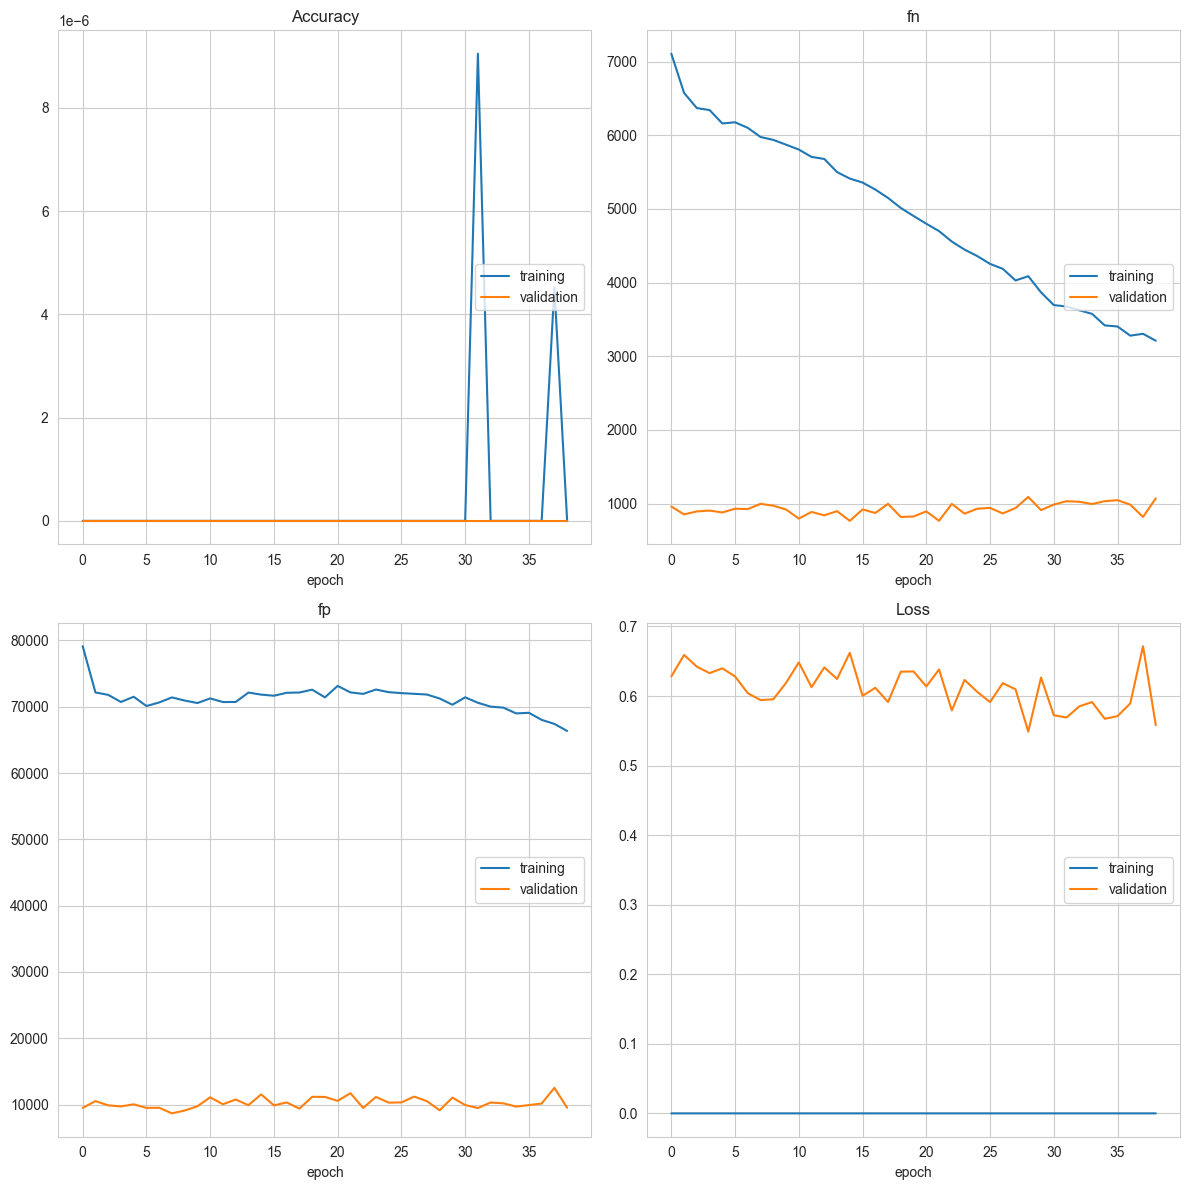

Accuracy
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
fn
	training         	 (min: 3210.000, max: 7106.000, cur: 3210.000)
	validation       	 (min:  765.000, max: 1090.000, cur: 1070.000)
fp
	training         	 (min: 66349.000, max: 79141.000, cur: 66349.000)
	validation       	 (min: 8663.000, max: 12513.000, cur: 9510.000)
Loss
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.549, max:    0.672, cur:    0.558)
215/215 - 3s - loss: 4.5802e-06 - fn: 3210.0000 - fp: 66349.0000 - Accuracy: 0.0000e+00 - val_loss: 0.5581 - val_fn: 1070.0000 - val_fp: 9510.0000 - val_Accuracy: 0.0000e+00 - 3s/epoch - 14ms/step
CPU times: total: 1min 23s
Wall time: 1min 47s


In [65]:
%%time

model.fit(
    X_train,
    y_train,
    batch_size=1028,
    epochs=50,
    verbose=2,
    validation_data=(X_val, y_val),
     callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
    class_weight=class_weight
)

In [66]:
model.evaluate(X_test, y_test)

1727/1727 [==============================] - 2s 1ms/step - loss: 0.5452 - fn: 1913.0000 - fp: 16206.0000 - Accuracy: 0.0000e+00


[0.5452051758766174, 1913.0, 16206.0, 0.0]

1727/1727 [==============================] - 1s 802us/step


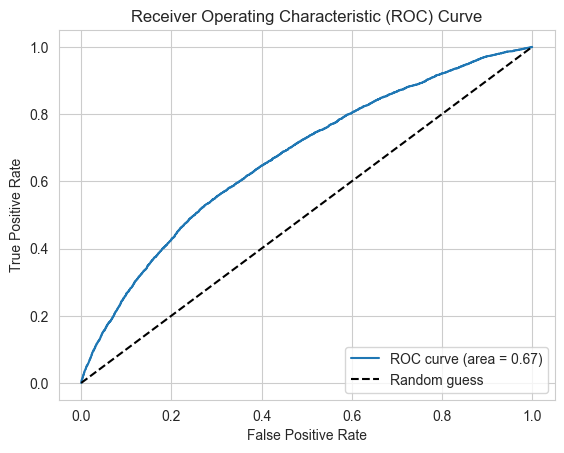

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

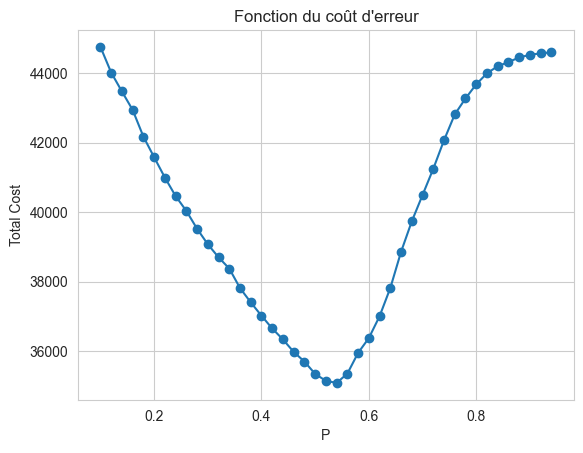

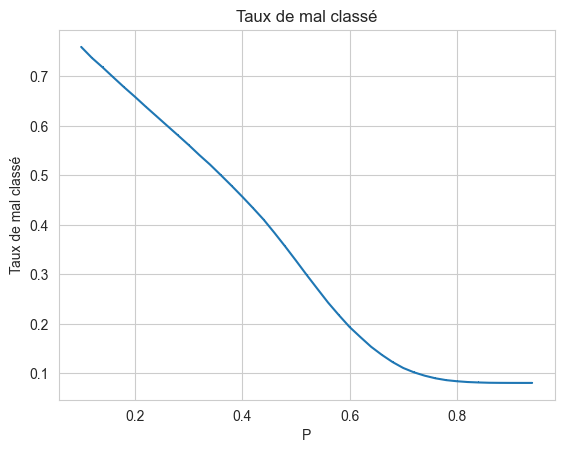

P  False Positives  False Negatives  Total Cost  misclassification_rate
0   0.10          41641.0            312.0     44761.0                0.759317
1   0.12          40362.0            366.0     44022.0                0.737145
2   0.14          39247.0            423.0     43477.0                0.717996
3   0.16          38065.0            488.0     42945.0                0.697779
4   0.18          36926.0            525.0     42176.0                0.677834
5   0.20          35822.0            576.0     41582.0                0.658775
6   0.22          34667.0            633.0     40997.0                0.638902
7   0.24          33543.0            692.0     40463.0                0.619627
8   0.26          32405.0            763.0     40035.0                0.600315
9   0.28          31280.0            824.0     39520.0                0.581057
10  0.30          30133.0            894.0     39073.0                0.561564
11  0.32          28918.0            978.0     38698.0                0.541094
12  0.34          27763.0           1061.0     38373.0                0.521692
13  0.36          26531.0           1128.0     37811.0                0.500606
14  0.38          25259.0           1214.0     37399.0                0.479141
15  0.40          23943.0           1307.0     37013.0                0.457005
16  0.42          22576.0           1407.0     36646.0                0.434074
17  0.44          21159.0           1517.0     36329.0                0.410418
18  0.46          19571.0           1640.0     35971.0                0.383903
19  0.48          17912.0           1778.0     35692.0                0.356374
20  0.50          16206.0           1913.0     35336.0                0.327940
21  0.52          14447.0           2069.0     35137.0                0.298927
22  0.54          12727.0           2235.0     35077.0                0.270801
23  0.56          10986.0           2436.0     35346.0                0.242928
24  0.58           9373.0           2657.0     35943.0                0.217734
25  0.60           7850.0           2852.0     36370.0                0.193698
26  0.62           6539.0           3046.0     36999.0                0.173481
27  0.64           5243.0           3257.0     37813.0                0.153843
28  0.66           4125.0           3473.0     38855.0                0.137518
29  0.68           3134.0           3660.0     39734.0                0.122966
30  0.70           2311.0           3818.0     40491.0                0.110930
31  0.72           1687.0           3956.0     41247.0                0.102134
32  0.74           1180.0           4089.0     42070.0                0.095365
33  0.76            774.0           4204.0     42814.0                0.090098
34  0.78            495.0           4278.0     43275.0                0.086388
35  0.80            313.0           4337.0     43683.0                0.084161
36  0.82            180.0           4382.0     44000.0                0.082569
37  0.84            105.0           4410.0     44205.0                0.081718
38  0.86             54.0           4427.0     44324.0                0.081103
39  0.88             27.0           4443.0     44457.0                0.080904
40  0.90             13.0           4452.0     44533.0                0.080813
41  0.92              6.0           4457.0     44576.0                0.080777
42  0.94              3.0           4460.0     44603.0                0.080777

In [69]:
metric_cost_error(y_test,y_pred,10,1)

In [71]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

1727/1727 [==============================] - 2s 928us/step


In [72]:
confusion_matrix(y_pred,y_test)

array([[34583,  1913],
       [16206,  2549]], dtype=int64)

### Interprétation


<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">2.4 LightGMB </div>
<a class="anchor" id="Section_1.1"></a>

Librairie de microsoft, modèle non linéaire

In [100]:
# https://www.kaggle.com/tilii7/olivier-lightgbm-parameters-by-bayesian-opt/code
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

clf.fit( X_train, y_train,
         eval_metric= 'auc', verbose= 200,
         eval_set=[(X_train, y_train), (X_val, y_val)],
         early_stopping_rounds= 200)

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.898845	training's binary_logloss: 0.293698	valid_1's auc: 0.689	valid_1's binary_logloss: 0.276772
[400]	training's auc: 0.912323	training's binary_logloss: 0.254296	valid_1's auc: 0.702468	valid_1's binary_logloss: 0.265173
[600]	training's auc: 0.919723	training's binary_logloss: 0.238421	valid_1's auc: 0.709774	valid_1's binary_logloss: 0.261276
[800]	training's auc: 0.924592	training's binary_logloss: 0.229529	valid_1's auc: 0.713417	valid_1's binary_logloss: 0.259548
[1000]	training's auc: 0.928273	training's binary_logloss: 0.224521	valid_1's auc: 0.715413	valid_1's binary_logloss: 0.258774
[1200]	training's auc: 0.931176	training's binary_logloss: 0.221082	valid_1's auc: 0.715765	valid_1's binary_logloss: 0.258555
[1400]	training's auc: 0.933978	training's binary_logloss: 0.218019	valid_1's auc: 0.715922	valid_1's binary_logloss: 0.258453


LGBMClassifier(colsample_bytree=0.9497036, learning_rate=0.02, max_depth=8,
               min_child_weight=39.3259775, min_split_gain=0.0222415,
               n_estimators=10000, nthread=4, num_leaves=34,
               reg_alpha=0.041545473, reg_lambda=0.0735294, silent=-1,
               subsample=0.8715623, verbose=-1)

In [102]:
confusion_matrix(y_test,clf.predict(X_test))

array([[50762,    27],
       [ 4438,    24]], dtype=int64)

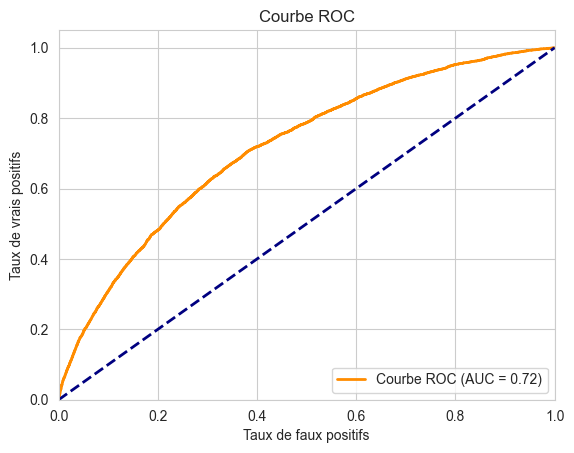

In [103]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

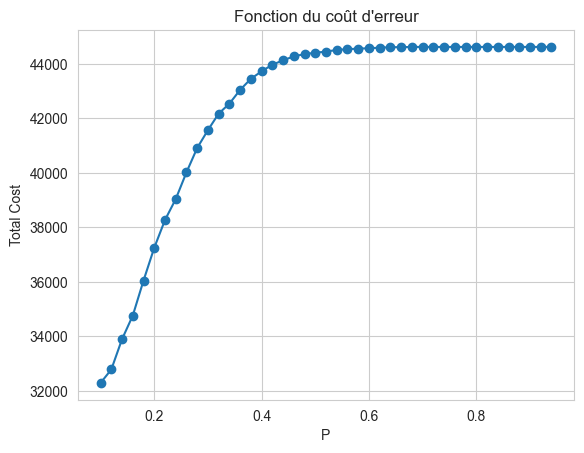

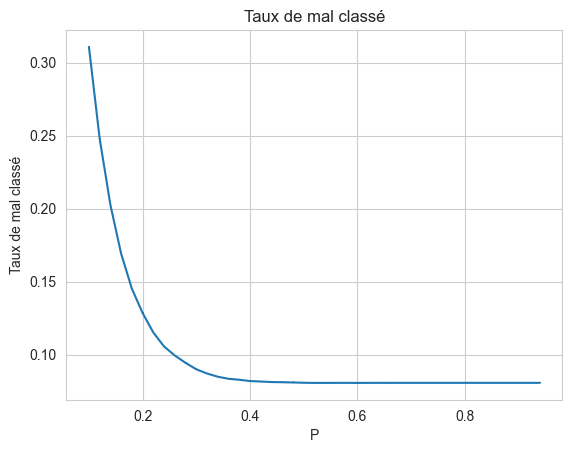

P  False Positives  False Negatives  Total Cost  misclassification_rate
0   0.10          15493.0           1680.0     32293.0                0.310818
1   0.12          11576.0           2121.0     32786.0                0.247905
2   0.14           8669.0           2523.0     33899.0                0.202566
3   0.16           6523.0           2824.0     34763.0                0.169173
4   0.18           4908.0           3114.0     36048.0                0.145192
5   0.20           3752.0           3350.0     37252.0                0.128541
6   0.22           2820.0           3545.0     38270.0                0.115202
7   0.24           2147.0           3689.0     39037.0                0.105627
8   0.26           1659.0           3836.0     40019.0                0.099455
9   0.28           1253.0           3966.0     40913.0                0.094460
10  0.30            908.0           4066.0     41568.0                0.090026
11  0.32            664.0           4151.0     42174.0                0.087148
12  0.34            489.0           4205.0     42539.0                0.084958
13  0.36            345.0           4270.0     43045.0                0.083528
14  0.38            260.0           4319.0     43450.0                0.082876
15  0.40            175.0           4355.0     43725.0                0.081989
16  0.42            128.0           4384.0     43968.0                0.081664
17  0.44             88.0           4404.0     44128.0                0.081302
18  0.46             65.0           4421.0     44275.0                0.081193
19  0.48             45.0           4431.0     44355.0                0.081012
20  0.50             27.0           4438.0     44407.0                0.080813
21  0.52             17.0           4443.0     44447.0                0.080723
22  0.54             10.0           4450.0     44510.0                0.080723
23  0.56              8.0           4453.0     44538.0                0.080741
24  0.58              7.0           4455.0     44557.0                0.080759
25  0.60              2.0           4457.0     44572.0                0.080704
26  0.62              2.0           4459.0     44592.0                0.080741
27  0.64              1.0           4461.0     44611.0                0.080759
28  0.66              0.0           4461.0     44610.0                0.080741
29  0.68              0.0           4462.0     44620.0                0.080759
30  0.70              0.0           4462.0     44620.0                0.080759
31  0.72              0.0           4462.0     44620.0                0.080759
32  0.74              0.0           4462.0     44620.0                0.080759
33  0.76              0.0           4462.0     44620.0                0.080759
34  0.78              0.0           4462.0     44620.0                0.080759
35  0.80              0.0           4462.0     44620.0                0.080759
36  0.82              0.0           4462.0     44620.0                0.080759
37  0.84              0.0           4462.0     44620.0                0.080759
38  0.86              0.0           4462.0     44620.0                0.080759
39  0.88              0.0           4462.0     44620.0                0.080759
40  0.90              0.0           4462.0     44620.0                0.080759
41  0.92              0.0           4462.0     44620.0                0.080759
42  0.94              0.0           4462.0     44620.0                0.080759

In [104]:
metric_cost_error (y_test, clf.predict_proba(X_test)[:,1],10,1)

### Interprétation des variables

In [105]:
feature_importance = clf.feature_importances_

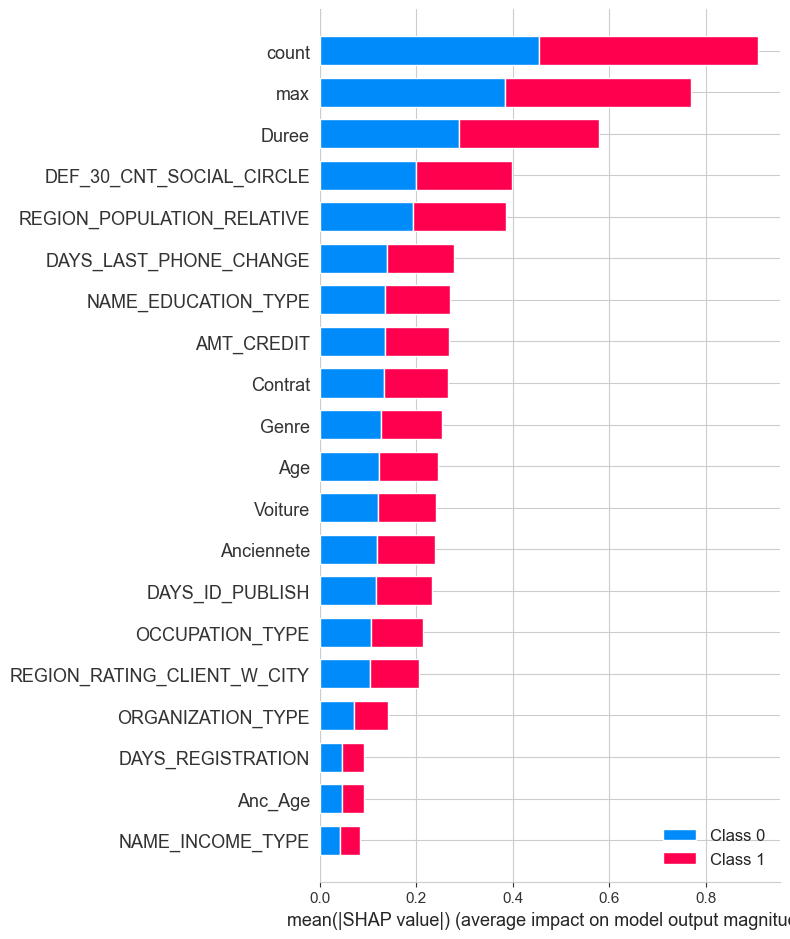

In [107]:
import shap

# Calculer les valeurs SHAP
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

# Visualiser les valeurs SHAP
shap.summary_plot(shap_values, X_test)


In [111]:
# Obtenir l'importance des variables
feature_importance = clf.feature_importances_

# Obtenir les noms des variables correspondantes
feature_names = clf.feature_name_

# Créer un dataframe avec les noms des variables et leurs importances
df_importance = pd.DataFrame({'Variable': feature_names, 'Importance': feature_importance})

# Calculer la variation moyenne de p pour une augmentation de 10% de chaque variable
df_importance['Variation moyenne de p'] = np.nan

for i, variable in enumerate(feature_names):
    # Copier les données originales
    X_modified = X_test.copy()

    # Augmenter la variable de 10%
    X_modified[variable] *= 1.1

    # Prédire les probabilités d'affectation avec la variable modifiée
    probabilities = clf.predict_proba(X_modified)[:, 1]

    # Calculer la variation moyenne de p
    variation_mean = np.mean(probabilities) - np.mean(clf.predict_proba(X_test)[:, 1])

    # Assigner la valeur dans le dataframe d'importance
    df_importance.loc[i, 'Variation moyenne de p'] = round(variation_mean*100,2)

# Trier le dataframe par ordre décroissant d'importance
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Afficher le dataframe
print(df_importance)

                       Variable  Importance  Variation moyenne de p
23                        Duree        5267                    1.17
7    REGION_POPULATION_RELATIVE        4829                   14.52
25                        count        3706                   43.81
3                    AMT_CREDIT        3335                    0.47
13              OCCUPATION_TYPE        2523                    9.06
22                          Age        2509                    0.03
21       DAYS_LAST_PHONE_CHANGE        2362                    0.22
19            ORGANIZATION_TYPE        2159                    5.87
9               DAYS_ID_PUBLISH        1989                    0.44
26                          max        1933                    0.45
8             DAYS_REGISTRATION        1862                    0.39
28                 ANC_par_CRED        1232                    0.01
29                      Anc_Age        1161                   -0.04
20     DEF_30_CNT_SOCIAL_CIRCLE        1031     

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">3. Pipeline du meilleur modèle </div>
<a class="anchor" id="Section_1.1"></a>

Au vu des résultats le modèle le plus intéressant est le XGBoost, pour deux raisons :
1. c'est le seul dont les FN diminuent lorsque nous minimisons la fonction de coût,
avec un transfert de FP, les politiques sont donc plus compréhensible.


2. c'est le modèle qui a le plus petit taux de mal classés soit la plus grande accuracy après modification de la règle d'affectation, c'est-à-dire l'autorisation de crédit.


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import joblib


# Définition des étapes du pipeline
scaler = MinMaxScaler()
scaler.fit(X_train)

# Création du pipeline avec les étapes de prétraitement et le meilleur modèle
pipeline = Pipeline([('preprocessing', scaler),
                    ('model', best_model_XGB)])

# Exportation du pipeline
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [66]:
df_test = pd.DataFrame(data=(pipeline.predict_proba(X_test)),columns=["acc","refus"])
df_test

acc     refus
0      0.743005  0.256995
1      0.455739  0.544261
2      0.545186  0.454814
3      0.483268  0.516732
4      0.885269  0.114731
...         ...       ...
61385  0.922874  0.077126
61386  0.527166  0.472834
61387  0.865146  0.134854
61388  0.891296  0.108704
61389  0.894412  0.105588

[61390 rows x 2 columns]

In [70]:
# Création d'un df compsé des index et de p pour la requete GET
# entre strealit et l'API
df_streamlit_p = df_streamlit.drop(columns="TARGET")
df_stream_proba = pd.DataFrame(data=pipeline.predict_proba(df_streamlit_p),
                               columns=["acc","refus"],
                               index=df_streamlit.index)["acc"]

In [71]:
df_stream_proba.to_csv("df_stream_proba.csv",sep=",")

In [67]:
df_stream_proba

SK_ID_CURR
264838    0.657635
229957    0.672585
100295    0.555958
183308    0.499248
199019    0.835876
            ...   
182930    0.780842
417826    0.628431
134431    0.832373
227543    0.576064
353558    0.851888
Name: acc, Length: 3069, dtype: float32

In [97]:
df_client = pd.DataFrame()
client = df_streamlit.loc[[264838],:].copy()
proba = pipeline.predict_proba(client)[0][0]
proba

0.6576349

In [101]:
client = df_streamlit.loc[[264838],:].copy().to_dict()
df_client = pd.DataFrame(client)
df_client

Contrat  Genre  Voiture  AMT_CREDIT  NAME_INCOME_TYPE  \
264838      0.0    0.0      0.0    414792.0               3.0   

        NAME_EDUCATION_TYPE  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
264838                  4.0                1.0                    0.010966   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  DEF_30_CNT_SOCIAL_CIRCLE  \
264838           -13269.0          -4578.0  ...                       1.0   

        DAYS_LAST_PHONE_CHANGE        Age      Duree  Anciennete  count   max  \
264838                 -1157.0  61.983562  22.542431         0.0    1.0 -86.0   

        ANCxCRED  ANC_par_CRED  Anc_Age  
264838       0.0           0.0      0.0  

[1 rows x 30 columns]

In [106]:
df_streamlit

Contrat  Genre  Voiture  AMT_CREDIT  NAME_INCOME_TYPE  \
SK_ID_CURR                                                          
264838          0.0    0.0      0.0    414792.0               3.0   
229957          0.0    1.0      1.0    296280.0               7.0   
100295          0.0    1.0      1.0   1019205.0               1.0   
183308          0.0    1.0      0.0    612612.0               3.0   
199019          0.0    0.0      1.0    630747.0               7.0   
...             ...    ...      ...         ...               ...   
182930          0.0    1.0      1.0    396171.0               7.0   
417826          0.0    0.0      0.0    879480.0               3.0   
134431          0.0    0.0      1.0    257391.0               4.0   
227543          0.0    1.0      1.0    777024.0               1.0   
353558          0.0    0.0      0.0    254700.0               3.0   

            NAME_EDUCATION_TYPE  NAME_HOUSING_TYPE  \
SK_ID_CURR                                           
264838                      4.0                1.0   
229957                      4.0                1.0   
100295                      4.0                1.0   
183308                      4.0                1.0   
199019                      4.0                1.0   
...                         ...                ...   
182930                      4.0                1.0   
417826                      4.0                1.0   
134431                      4.0                1.0   
227543                      4.0                1.0   
353558                      4.0                1.0   

            REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
SK_ID_CURR                                                                   
264838                        0.010966           -13269.0          -4578.0   
229957                        0.010643            -2964.0          -4849.0   
100295                        0.072508             -335.0          -3224.0   
183308                        0.072508              -56.0          -2245.0   
199019                        0.022625            -2065.0            -81.0   
...                                ...                ...              ...   
182930                        0.020246            -7129.0          -1590.0   
417826                        0.035792            -5023.0          -1516.0   
134431                        0.025164            -7864.0          -2443.0   
227543                        0.008575            -3282.0          -2850.0   
353558                        0.009657            -2778.0          -4064.0   

            ...  DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE        Age  \
SK_ID_CURR  ...                                                                
264838      ...                       1.0                 -1157.0  61.983562   
229957      ...                       0.0                     0.0  33.504110   
100295      ...                       0.0                   -14.0  31.112329   
183308      ...                       0.0                 -1651.0  51.232877   
199019      ...                       0.0                     0.0  57.523288   
...         ...                       ...                     ...        ...   
182930      ...                       0.0                 -1097.0  24.391781   
417826      ...                       0.0                 -1515.0  59.528767   
134431      ...                       0.0                 -2282.0  51.778082   
227543      ...                       0.0                  -745.0  28.043836   
353558      ...                       0.0                  -628.0  67.767123   

                Duree  Anciennete  count     max      ANCxCRED  ANC_par_CRED  \
SK_ID_CURR                                                                     
264838      22.542431    0.000000    1.0   -86.0  0.000000e+00      0.000000   
229957      12.586504    7.994521    1.0  -821.0  2.368617e+06      0.000027   
100295      32.843677    1.649315  

In [102]:
import json

dictionnaire = df_streamlit.loc[[264838],:].copy().to_dict()
# Conversion en JSON
json_data = json.dumps(dictionnaire)

# Écriture du JSON dans un fichier
with open('dictionnaire.json', 'w') as fichier:
    fichier.write(json_data)

In [75]:
df_stream_proba.loc[264838]

0.6576349

In [217]:
pipeline.predict_proba(X_test)[0,0]

0.74300456

In [234]:
X_train

Contrat  Genre  Voiture  AMT_CREDIT  NAME_INCOME_TYPE  \
SK_ID_CURR                                                          
354928          0.0    0.5      0.0    0.133638          1.000000   
369251          0.0    0.5      0.0    0.167478          0.142857   
322855          0.0    0.0      0.0    0.081299          0.428571   
245487          0.0    0.0      0.0    0.178107          0.428571   
223395          0.0    0.0      0.0    0.024723          1.000000   
...             ...    ...      ...         ...               ...   
145015          0.0    0.0      1.0    0.201942          1.000000   
444085          0.0    0.5      1.0    0.265791          1.000000   
192320          0.0    0.0      0.0    0.164998          1.000000   
225500          0.0    0.0      0.0    0.027173          1.000000   
112713          0.0    0.5      1.0    0.116465          1.000000   

            NAME_EDUCATION_TYPE  NAME_HOUSING_TYPE  \
SK_ID_CURR                                           
354928                     1.00                0.2   
369251                     0.25                0.2   
322855                     1.00                0.2   
245487                     1.00                0.2   
223395                     1.00                0.2   
...                         ...                ...   
145015                     1.00                0.2   
444085                     1.00                0.2   
192320                     1.00                0.2   
225500                     1.00                0.2   
112713                     1.00                0.2   

            REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
SK_ID_CURR                                                                   
354928                        0.107023           0.723411         0.348617   
369251                        0.635991           0.871839         0.556899   
322855                        0.158035           0.876338         0.624010   
245487                        0.038481           0.423030         0.305683   
223395                        0.421848           0.835279         0.612477   
...                                ...                ...              ...   
145015                        0.065247           0.746474         0.418786   
444085                        0.392880           0.664235         0.378491   
192320                        0.141377           0.980342         0.442546   
225500                        0.344429           0.842129         0.599833   
112713                        0.361433           0.802853         0.372933   

            ...  DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE       Age  \
SK_ID_CURR  ...                                                               
354928      ...                  0.000000                0.434529  0.293010   
369251      ...                  0.000000                0.417288  0.482356   
322855      ...                  0.000000                0.883504  0.660034   
245487      ...                  0.000000                0.676841  0.817813   
223395      ...                  0.000000                0.824557  0.269560   
...         ...                       ...                     ...       ...   
145015      ...                  0.000000                0.349021  0.425197   
444085      ...                  0.029412                0.884902  0.476832   
192320      ...                  0.000000                0.587372  0.409865   
225500      ...                  0.000000                1.000000  0.152368   
112713      ...                  0.000000                0.577819  0.316009   

               Duree  Anciennete    count       max  ANCxCRED  ANC_par_CRED  \
SK_ID_CURR                                                                    
354928      0.276333    0.084134  0.06250  0.926420  0.017410      0.013073   
369251      0.312615    0.081342  0.06250  0.433949  0.020668      0.010293   
322855      0.045079    0.000000  0.06250  0.965777 

In [237]:
pipeline.predict_proba(test)

array([[0.74300456, 0.25699547]], dtype=float32)

In [ ]:
pipeline.predict_proba(X_test)

In [236]:
test = X_test.head(1)
test

Contrat  Genre  Voiture  AMT_CREDIT  NAME_INCOME_TYPE  \
SK_ID_CURR                                                          
339116          0.0    0.5      0.0    0.167478               1.0   

            NAME_EDUCATION_TYPE  NAME_HOUSING_TYPE  \
SK_ID_CURR                                           
339116                      1.0                0.2   

            REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
SK_ID_CURR                                                                   
339116                        0.421848           0.810433         0.669446   

            ...  DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE       Age  \
SK_ID_CURR  ...                                                               
339116      ...                       0.0                0.937558  0.640079   

               Duree  Anciennete  count  max  ANCxCRED  ANC_par_CRED  Anc_Age  
SK_ID_CURR                                                                     
339116      0.202684    0.486155    0.0  1.0  0.123525      0.061518  0.63406  

[1 rows x 30 columns]

In [105]:
pipeline

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('model',
                 XGBClassifier(alpha=0.3, base_score=None, booster=None,
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=0.8,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               feature_types=None, gamma=1, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, lambda=0.3,
                               learning_rate=0.05, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=15,
                               max_leaves=None, min_child_weight=6, missing=nan,
                               monotone_constraints=None, n_estimators=80,
                               n_jobs=None, num_parallel_tree=None, ...))])